In [1094]:
# import packages

import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# ml 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# train and test
from sklearn.model_selection import train_test_split, GridSearchCV

# metrics
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Load & explore data

In [676]:
# read text file

data = pd.read_csv('household_power_consumption.txt', sep=';')
print(data.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [593]:
data.shape

(2075259, 9)

In [595]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [386]:
data['Sub_metering_1'].value_counts()

Sub_metering_1
0.000    1840611
1.000      82920
0.0        39564
?          25979
2.000      18537
          ...   
72.0           1
81.0           1
76.0           1
63.0           1
57.0           1
Name: count, Length: 153, dtype: int64

In [388]:
data[data['Sub_metering_1']== '?']

Date      Time Global_active_power Global_reactive_power  \
6839     21/12/2006  11:23:00                   ?                     ?   
6840     21/12/2006  11:24:00                   ?                     ?   
19724    30/12/2006  10:08:00                   ?                     ?   
19725    30/12/2006  10:09:00                   ?                     ?   
41832     14/1/2007  18:36:00                   ?                     ?   
...             ...       ...                 ...                   ...   
1990185   28/9/2010  19:09:00                   ?                     ?   
1990186   28/9/2010  19:10:00                   ?                     ?   
1990187   28/9/2010  19:11:00                   ?                     ?   
1990188   28/9/2010  19:12:00                   ?                     ?   
2027411  24/10/2010  15:35:00                   ?                     ?   

        Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
6839          ?                ?              ?              ?             NaN  
6840          ?                ?              ?              ?             NaN  
19724         ?                ?              ?              ?             NaN  
19725         ?                ?              ?              ?             NaN  
41832         ?                ?              ?              ?             NaN  
...         ...              ...            ...            ...             ...  
1990185       ?                ?              ?              ?             NaN  
1990186       ?                ?              ?              ?             NaN  
1990187       ?                ?              ?              ?             NaN  
1990188       ?                ?              ?              ?             NaN  
2027411       ?                ?              ?              ?             NaN  

[25979 rows x 9 columns]

In [392]:
data[data['Sub_metering_3'].isna()]

Date      Time Global_active_power Global_reactive_power  \
6839     21/12/2006  11:23:00                   ?                     ?   
6840     21/12/2006  11:24:00                   ?                     ?   
19724    30/12/2006  10:08:00                   ?                     ?   
19725    30/12/2006  10:09:00                   ?                     ?   
41832     14/1/2007  18:36:00                   ?                     ?   
...             ...       ...                 ...                   ...   
1990185   28/9/2010  19:09:00                   ?                     ?   
1990186   28/9/2010  19:10:00                   ?                     ?   
1990187   28/9/2010  19:11:00                   ?                     ?   
1990188   28/9/2010  19:12:00                   ?                     ?   
2027411  24/10/2010  15:35:00                   ?                     ?   

        Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
6839          ?                ?              ?              ?             NaN  
6840          ?                ?              ?              ?             NaN  
19724         ?                ?              ?              ?             NaN  
19725         ?                ?              ?              ?             NaN  
41832         ?                ?              ?              ?             NaN  
...         ...              ...            ...            ...             ...  
1990185       ?                ?              ?              ?             NaN  
1990186       ?                ?              ?              ?             NaN  
1990187       ?                ?              ?              ?             NaN  
1990188       ?                ?              ?              ?             NaN  
2027411       ?                ?              ?              ?             NaN  

[25979 rows x 9 columns]

In [678]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [680]:
col = ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

In [682]:
# replacing "?" to nan

for i in col:
    data[i] = data[i].replace('?', np.nan)

In [602]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [605]:
(data.isnull().sum() / len(data)) * 100

Date                     0.000000
Time                     0.000000
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64

In [607]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [684]:
data[col] = data[col].astype(float)

In [685]:
data.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

## Changing date and time into datatime type

In [688]:
data['DateTime'] = pd.to_datetime(data['Date']+ ' ' + data['Time'])

data.drop(['Date', 'Time'], axis = 1, inplace = True)

In [689]:
data.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3            DateTime  
0             0.0             1.0            17.0 2006-12-16 17:24:00  
1             0.0             1.0            16.0 2006-12-16 17:25:00  
2             0.0             2.0            17.0 2006-12-16 17:26:00  
3             0.0             1.0            17.0 2006-12-16 17:27:00  
4             0.0             1.0            17.0 2006-12-16 17:28:00

# EDA

In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   DateTime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [382]:
data.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06   
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00   
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00   
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01   
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01   
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00   

                            DateTime  
count                        2075259  
mean   2008-12-06 07:12:59.999994112  
min              2006-12-16 17:24:00  
25%              2007-12-12 00:18:30  
50%              2008-12-06 07:13:00  
75%              2009-12-01 14:07:30  
max              2010-11-26 21:02:00  
std                              NaN

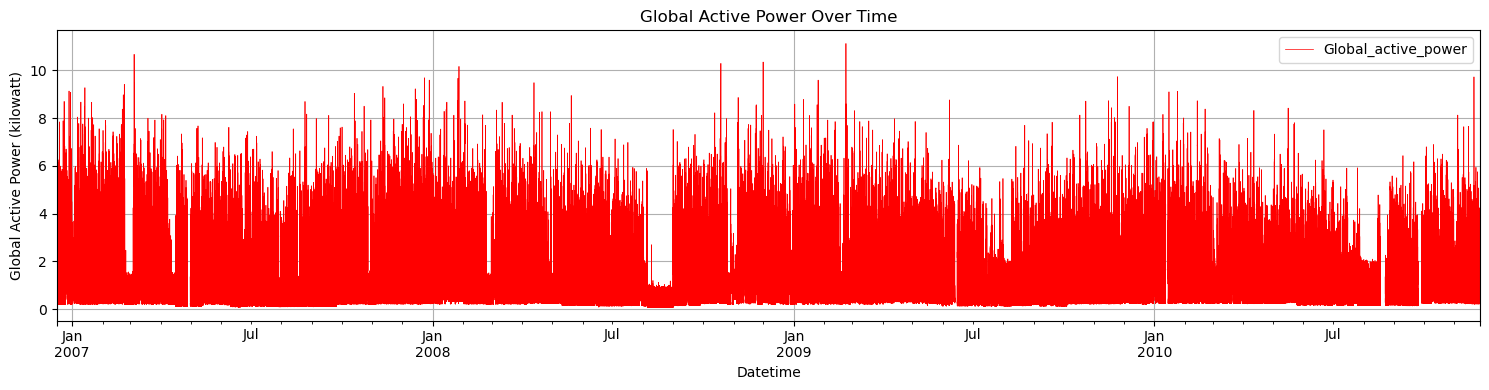

In [384]:
# Global Active Power Over Time

data.plot(
    x='DateTime',
    y='Global_active_power',
    kind='line',
    figsize=(15, 4),
    color='r',
    linewidth=0.5,
    title='Global Active Power Over Time',
    grid=True
)
plt.xlabel("Datetime")
plt.ylabel("Global Active Power (kilowatt)")
plt.tight_layout()
plt.show()

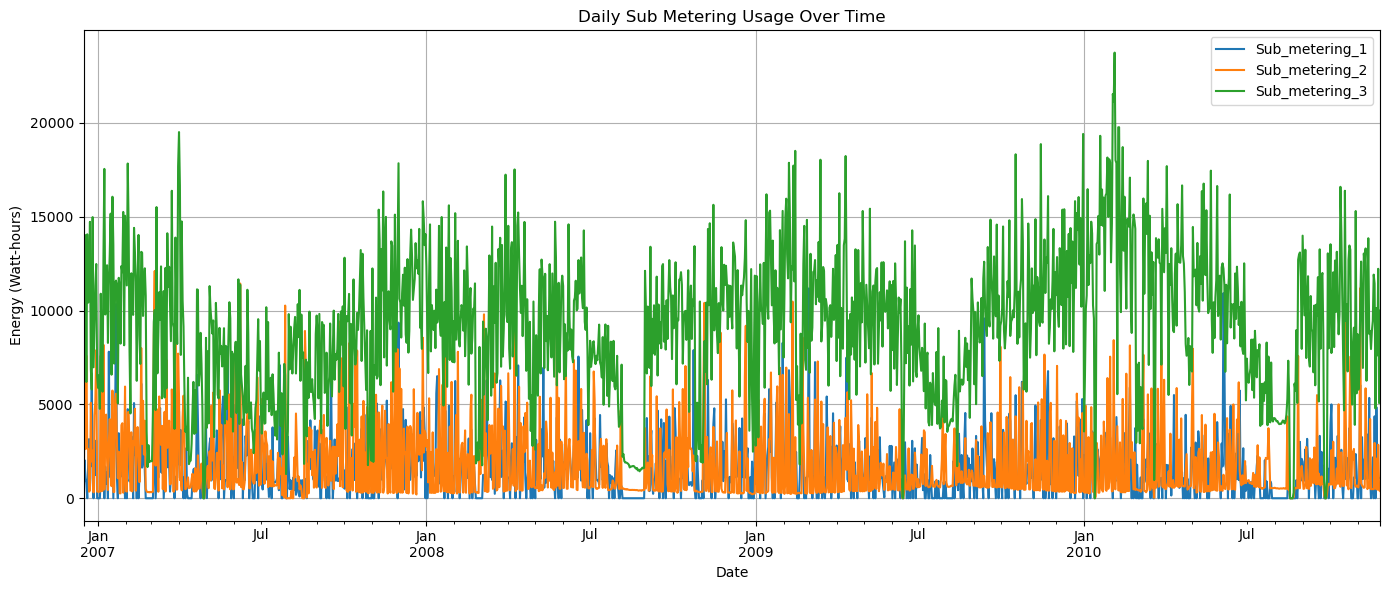

In [386]:
# Daily Sub Metering Usage Over Time

# Resample daily
daily_subs = data.set_index('DateTime')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('D').sum()

# Plot
daily_subs.plot(figsize=(14, 6))

plt.legend()
plt.title("Daily Sub Metering Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Energy (Watt-hours)")
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='Voltage', ylabel='Global_active_power'>

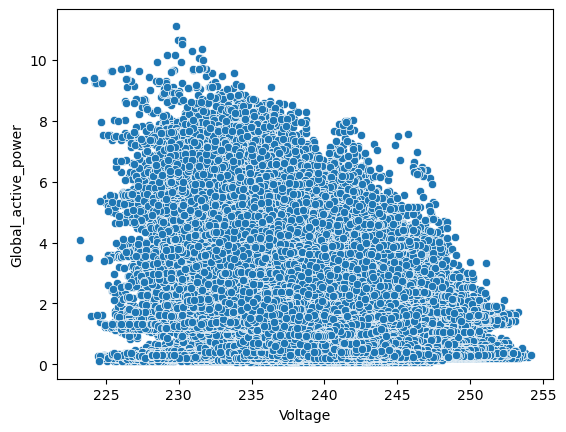

In [388]:
# scstter plot of global active power

sns.scatterplot(x='Voltage', y='Global_active_power', data=data)

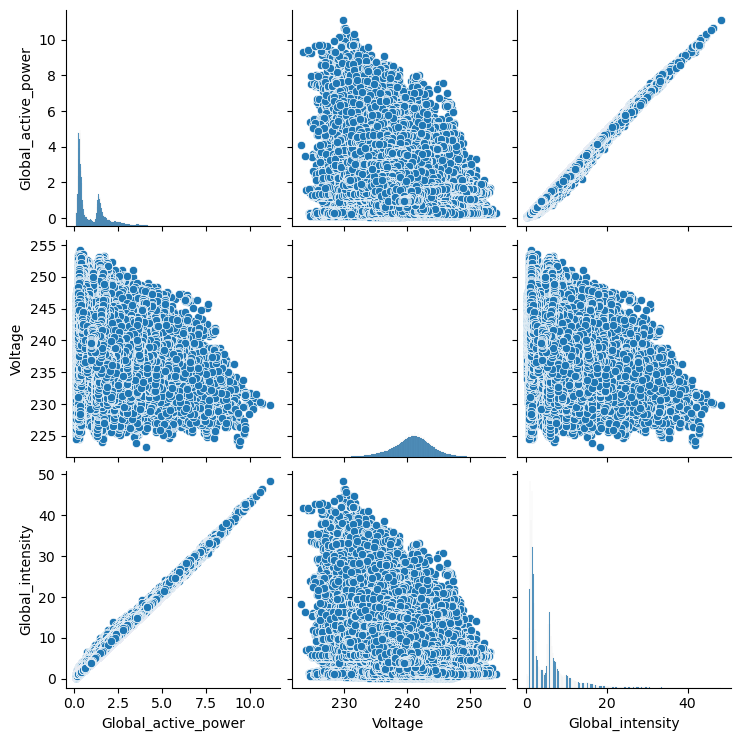

In [390]:
sns.pairplot(data[['Global_active_power', 'Voltage', 'Global_intensity']])

<Axes: >

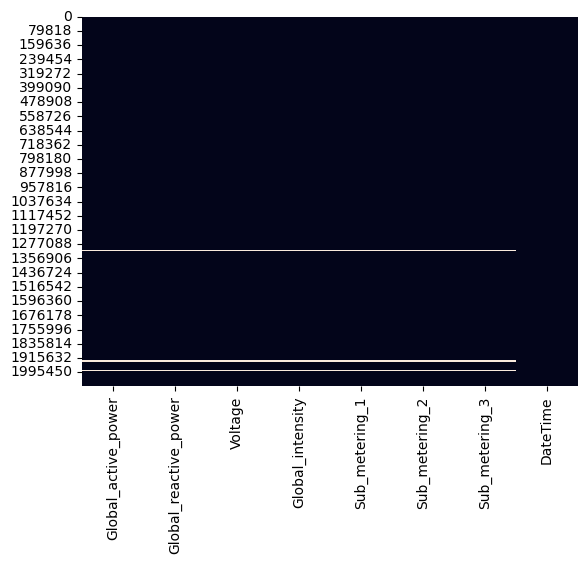

In [392]:
# nan values heatmap

sns.heatmap(data.isnull(), cbar=False)

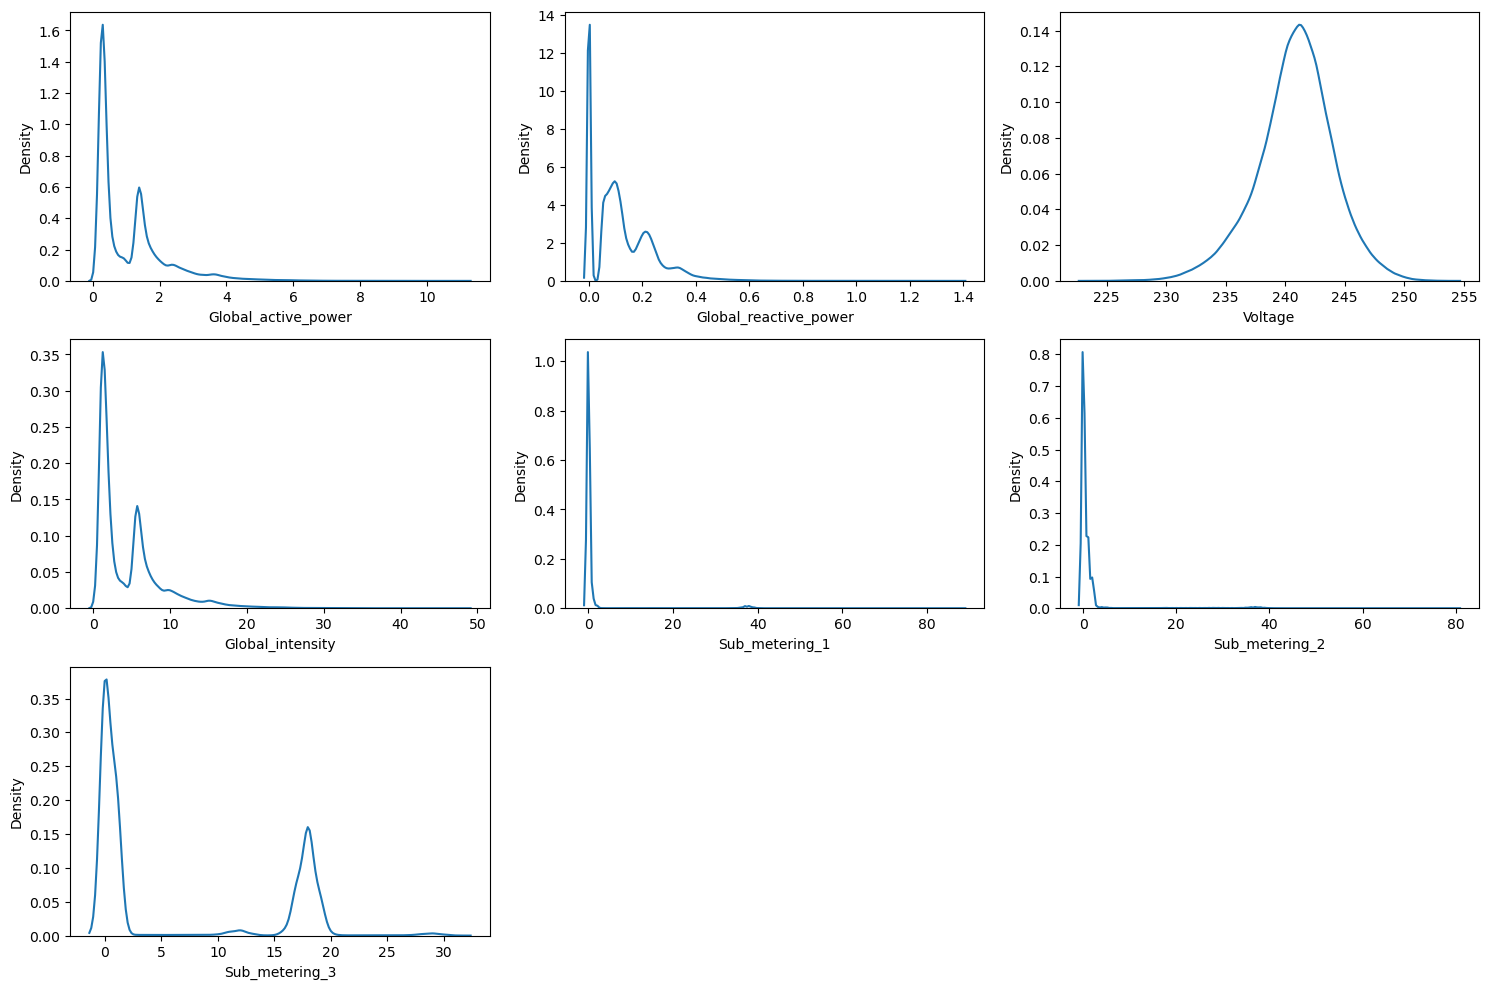

In [394]:
#  checking skewness of all features

plt.figure(figsize=(15,10))

for ind, i in enumerate(data.drop('DateTime', axis = 1).columns):
    plt.subplot(3,3, ind +1)
    sns.kdeplot(data[i])
plt.tight_layout()
plt.show()

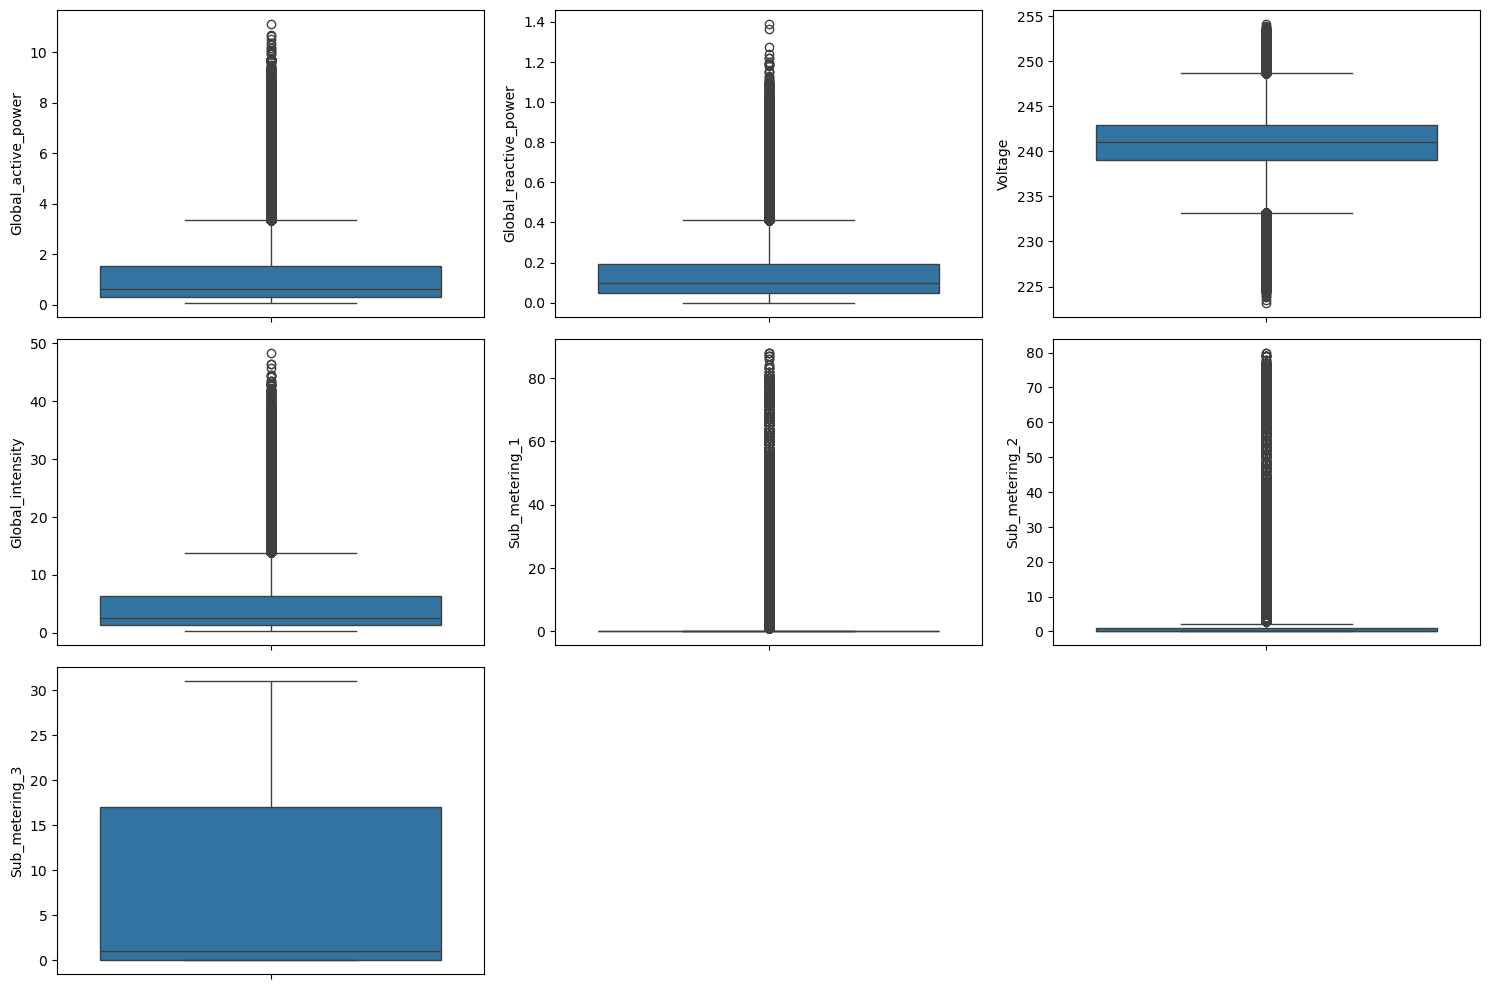

In [400]:
# Outlier 

plt.figure(figsize=(15,10))

for ind, i in enumerate(data.drop('DateTime', axis = 1).columns):
    plt.subplot(3,3, ind +1)
    sns.boxplot(data[i])
plt.tight_layout()
plt.show()

<Axes: >

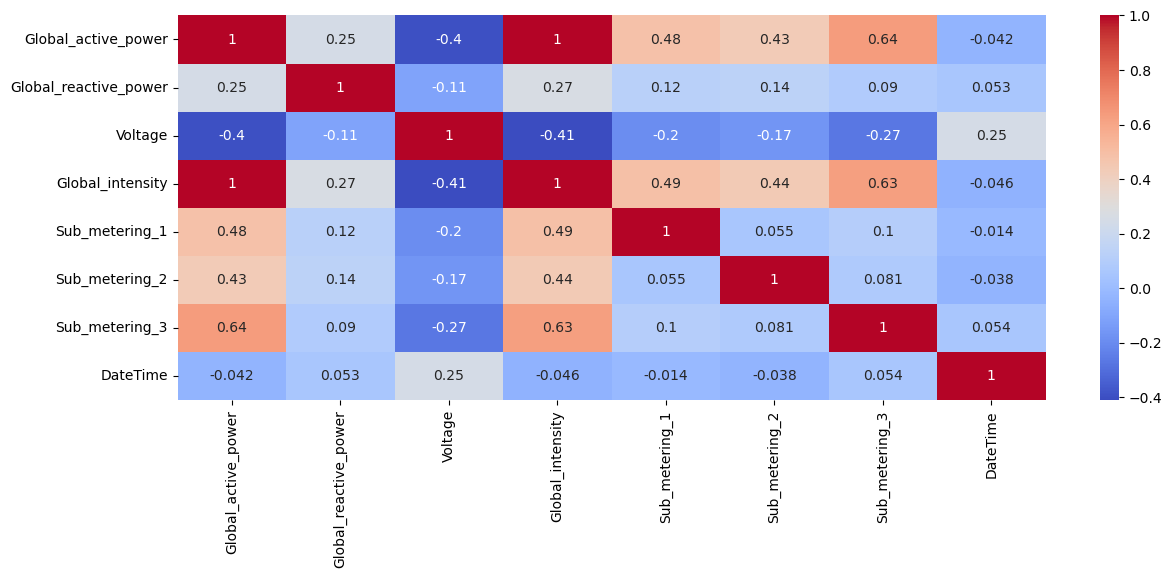

In [402]:
# Checking correlation

plt.figure(figsize=(14,5))

sns.heatmap(data.corr(), cmap="coolwarm", annot= True)

# Feature engineering

In [616]:
data.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3            DateTime  
0             0.0             1.0            17.0 2006-12-16 17:24:00  
1             0.0             1.0            16.0 2006-12-16 17:25:00  
2             0.0             2.0            17.0 2006-12-16 17:26:00  
3             0.0             1.0            17.0 2006-12-16 17:27:00  
4             0.0             1.0            17.0 2006-12-16 17:28:00

In [618]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'DateTime'],
      dtype='object')

In [692]:
data['Date'] = data['DateTime'].dt.date

data['Time'] = data['DateTime'].dt.time

data['Hour'] = data['DateTime'].dt.hour

data['Weekday'] = data['DateTime'].dt.dayofweek

data['Weekend'] = data['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
data.drop('DateTime', axis = 1, inplace = True)

In [621]:
data.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3        Date      Time  Hour  \
0             0.0             1.0            17.0  2006-12-16  17:24:00    17   
1             0.0             1.0            16.0  2006-12-16  17:25:00    17   
2             0.0             2.0            17.0  2006-12-16  17:26:00    17   
3             0.0             1.0            17.0  2006-12-16  17:27:00    17   
4             0.0             1.0            17.0  2006-12-16  17:28:00    17   

   Weekday  Weekend  
0        5        1  
1        5        1  
2        5        1  
3        5        1  
4        5        1

In [624]:
# Handle missing 



In [694]:
selected_col = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1', 'Sub_metering_2',
                           'Sub_metering_3']

In [696]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Date                         0
Time                         0
Hour                         0
Weekday                      0
Weekend                      0
dtype: int64

In [698]:
data[data['Weekend'] ==1][selected_col].isnull().sum()

Global_active_power      13384
Global_reactive_power    13384
Voltage                  13384
Global_intensity         13384
Sub_metering_1           13384
Sub_metering_2           13384
Sub_metering_3           13384
dtype: int64

In [700]:
data[data['Weekend'] ==1][selected_col].mean()

Global_active_power        1.234232
Global_reactive_power      0.139691
Voltage                  240.727577
Global_intensity           5.240781
Sub_metering_1             1.761079
Sub_metering_2             1.694374
Sub_metering_3             6.701666
dtype: float64

In [702]:

# Get means of selected columns for weekend rows
weekend_means = data[data['Weekend'] == 1][selected_col].mean()

# Fill NaNs in weekend rows with weekend-specific means
for col in selected_col:
    data.loc[(data['Weekend'] == 1) & (data[col].isna()), col] = weekend_means[col]

In [704]:
data.isnull().sum()

Global_active_power      12595
Global_reactive_power    12595
Voltage                  12595
Global_intensity         12595
Sub_metering_1           12595
Sub_metering_2           12595
Sub_metering_3           12595
Date                         0
Time                         0
Hour                         0
Weekday                      0
Weekend                      0
dtype: int64

In [706]:
# Get means of selected columns for weekday rows
weekend_means = data[data['Weekend'] == 0][selected_col].mean()

# Fill NaNs in weekend rows with weekday-specific means
for col in selected_col:
    data.loc[(data['Weekend'] == 0) & (data[col].isna()), col] = weekend_means[col]

In [707]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Date                     0
Time                     0
Hour                     0
Weekday                  0
Weekend                  0
dtype: int64

In [710]:
data['Daily_avg'] = data.groupby('Date')['Global_active_power'].transform('mean')

data['GAP_rolling_60min'] = data['Global_active_power'].rolling(window=60, min_periods=1).mean()

data['Peak_Hour'] = data['Hour'].apply(lambda x: 1 if 18 <= x <= 21 else 0)

In [711]:
data['Date'] = pd.to_datetime(data['Date'])

In [646]:
data.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3       Date      Time  Hour  \
0             0.0             1.0            17.0 2006-12-16  17:24:00    17   
1             0.0             1.0            16.0 2006-12-16  17:25:00    17   
2             0.0             2.0            17.0 2006-12-16  17:26:00    17   
3             0.0             1.0            17.0 2006-12-16  17:27:00    17   
4             0.0             1.0            17.0 2006-12-16  17:28:00    17   

   Weekday  Weekend  Daily_avg  GAP_rolling_60min  Peak_Hour  
0        5        1   3.053475           4.216000          0  
1        5        1   3.053475           4.788000          0  
2        5        1   3.053475           4.983333          0  
3        5        1   3.053475           5.084500          0  
4        5        1   3.053475           4.800800          0

# EDA after feature engineer

In [649]:
# Average Usage by Hour of the Day

In [651]:
# Energy Management for Households 

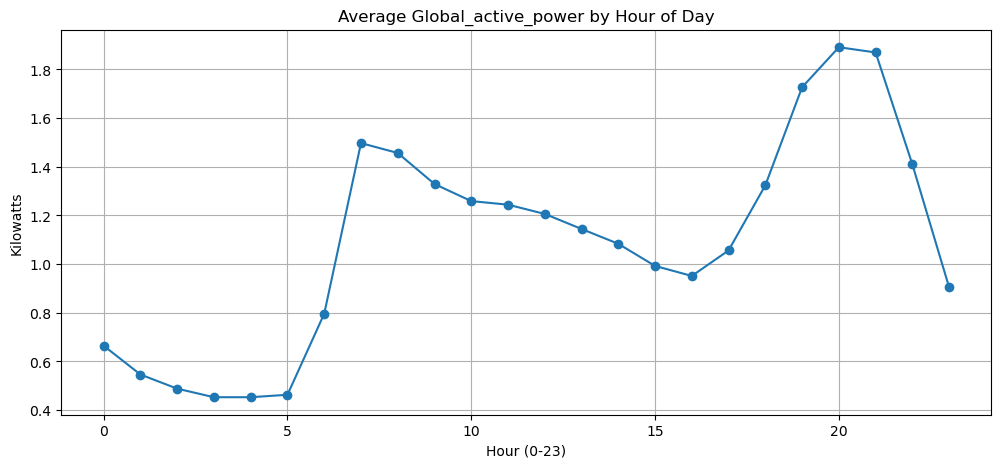

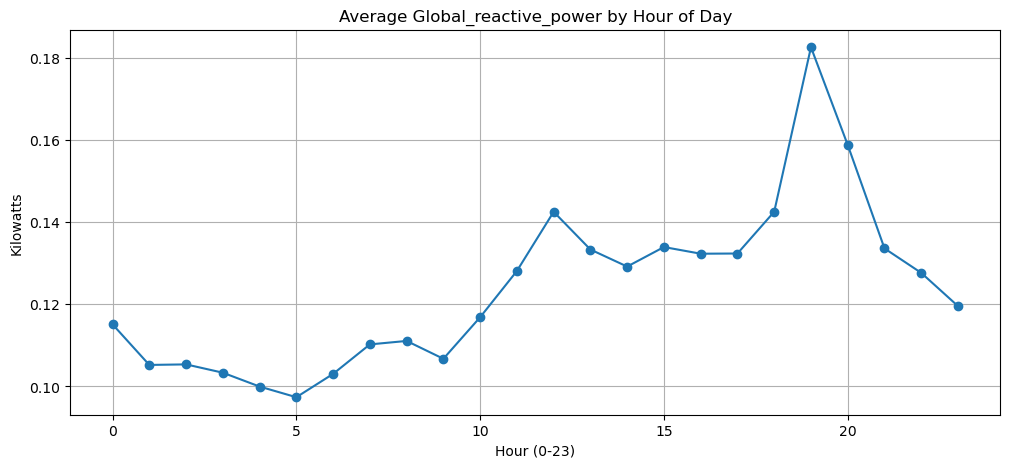

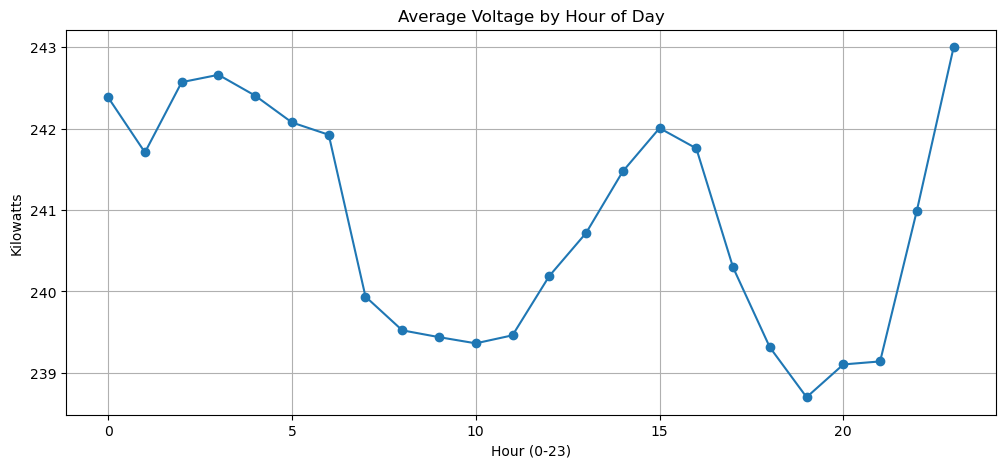

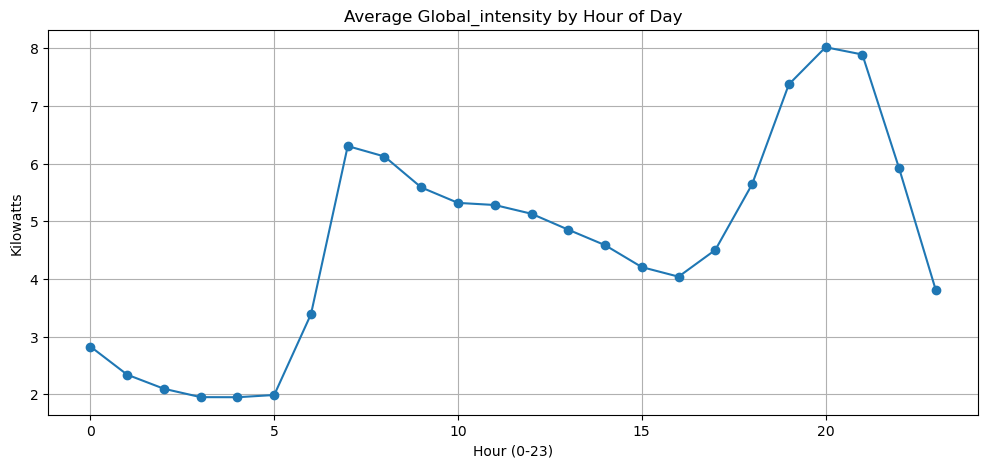

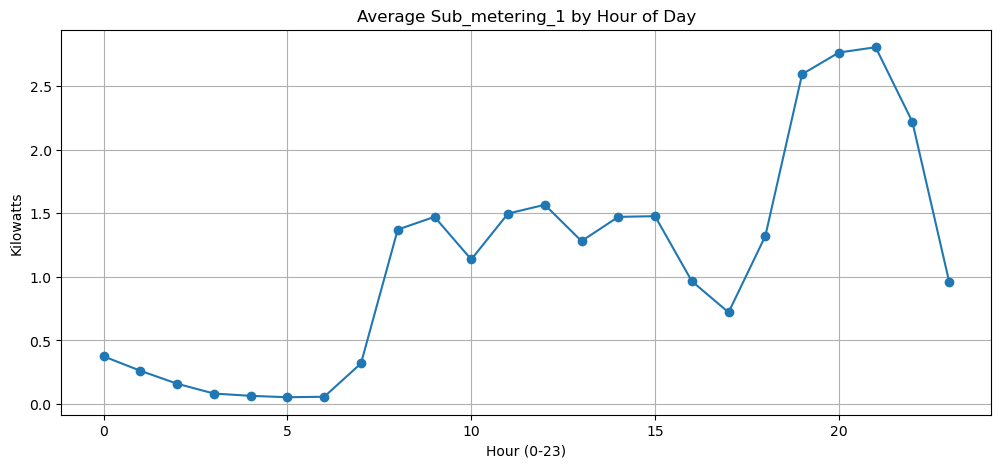

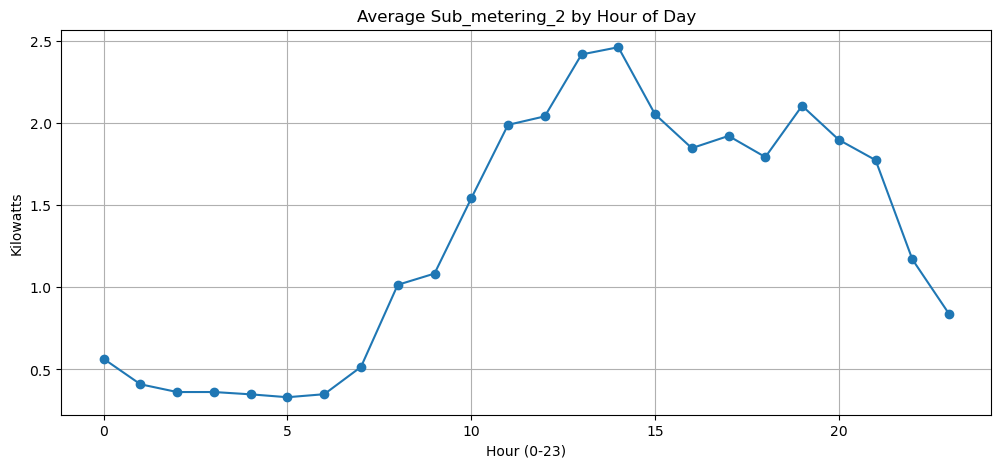

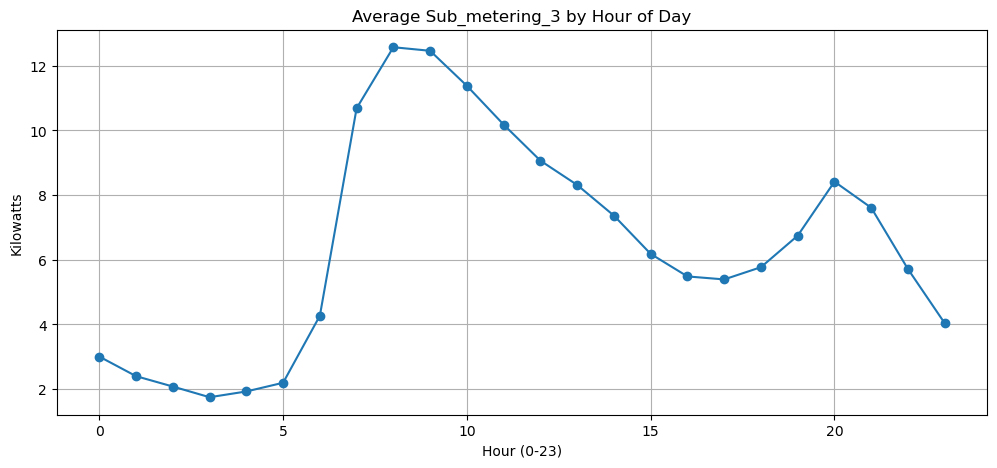

In [441]:
# Group by Hour and take the mean
hourly_avg = data.groupby('Hour')[selected_col].mean()

# Plot
for i in selected_col:
    hourly_avg[i].plot(kind='line', marker='o', figsize=(12, 5), title = f'Average {i} by Hour of Day')
    plt.ylabel('Kilowatts')
    plt.xlabel('Hour (0-23)')
    plt.grid(True)
    plt.show()

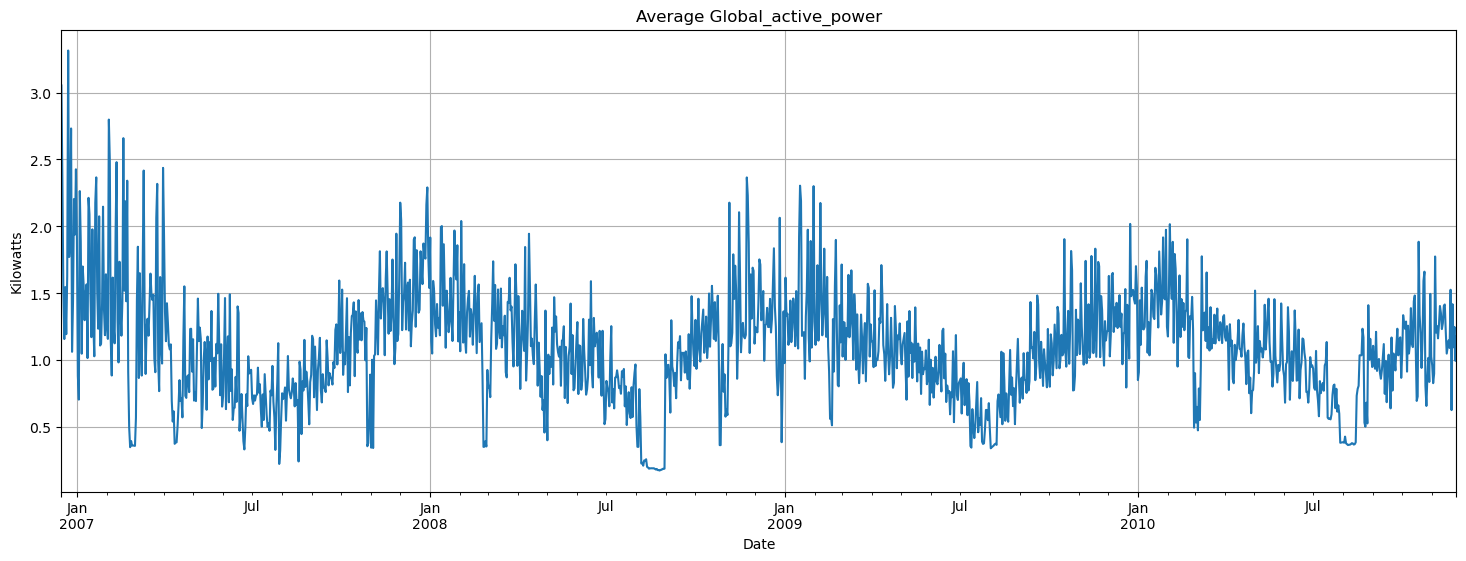

In [444]:
# daily average of Global_active_power

# Group by Date and take the mean
daily_avg = data.groupby('Date')['Global_active_power'].mean()

# Plot
daily_avg.plot(figsize=(18, 6), title = 'Average Global_active_power')
plt.ylabel('Kilowatts')
plt.xlabel('Date')
plt.grid(True)
plt.show()

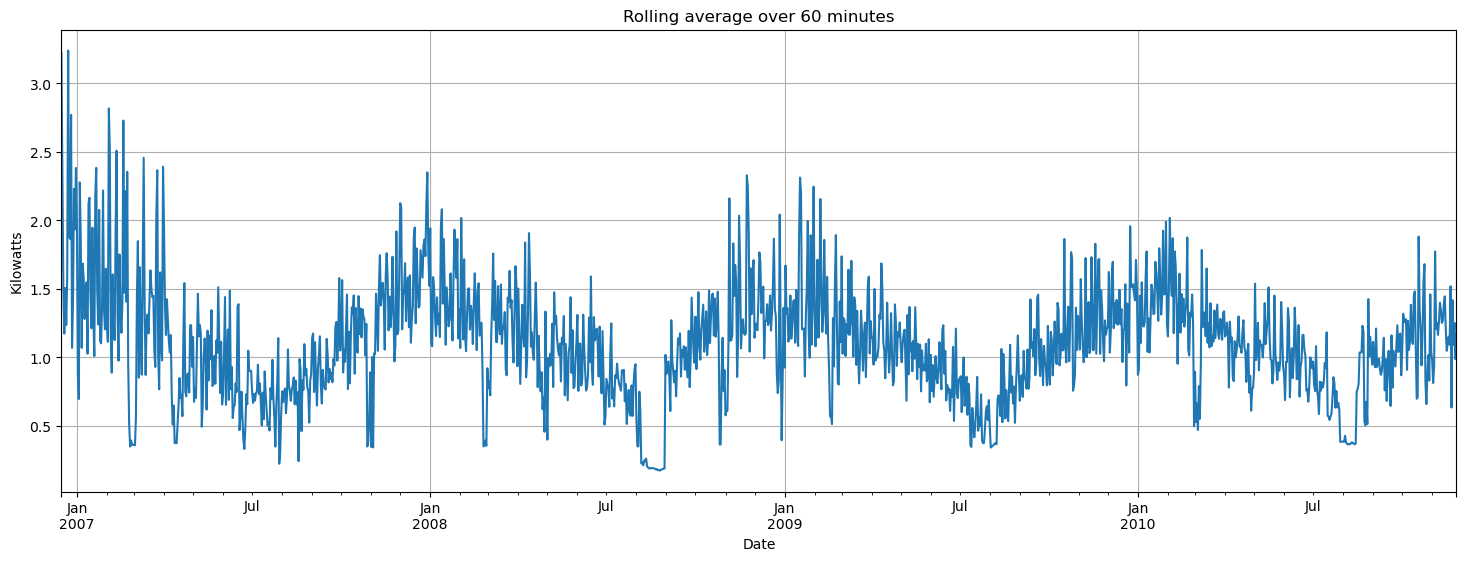

In [446]:
# Rolling average over 60 minutes

# Group by Hour and take the mean
rolling_60min = data.groupby('Date')['GAP_rolling_60min'].mean()

# Plot
rolling_60min.plot(figsize=(18, 6), title = 'Rolling average over 60 minutes')
plt.ylabel('Kilowatts')
plt.xlabel('Date')
plt.grid(True)
plt.show()

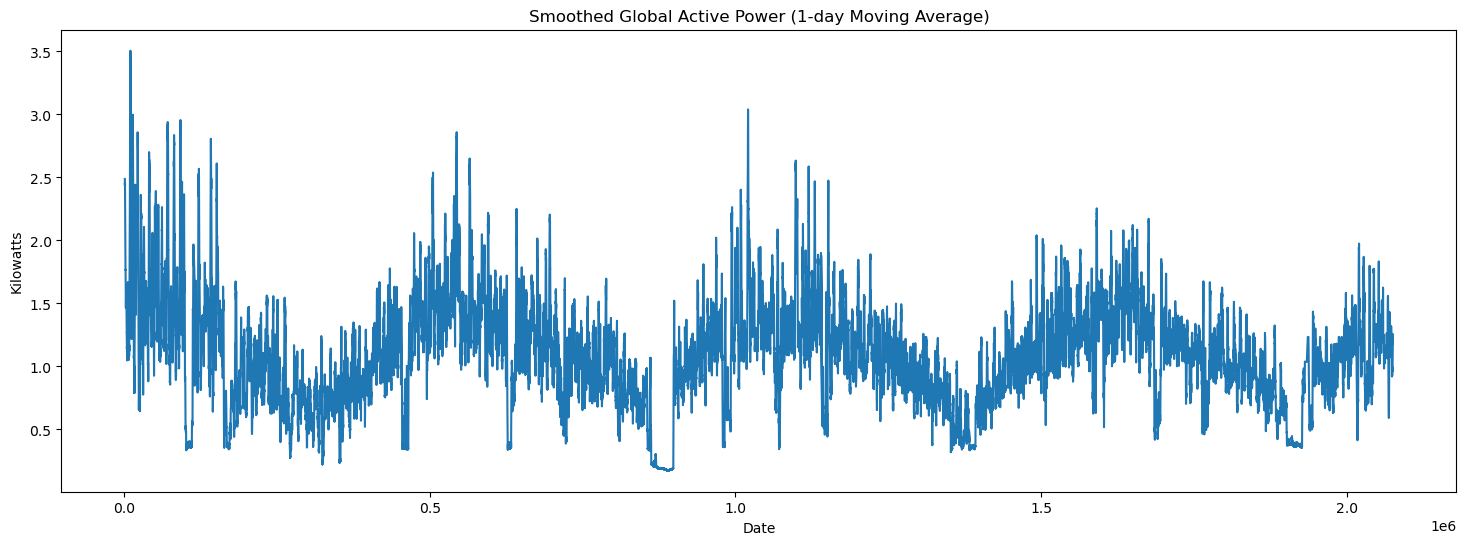

In [448]:
# one day trend by raw Global_active_power

rolling_avg = data['Global_active_power'].rolling(window=1440).mean()  # 1440 = 1 day if per minute

rolling_avg.plot(figsize=(18, 6), title='Smoothed Global Active Power (1-day Moving Average)')
plt.ylabel('Kilowatts')
plt.xlabel('Date')
plt.show()

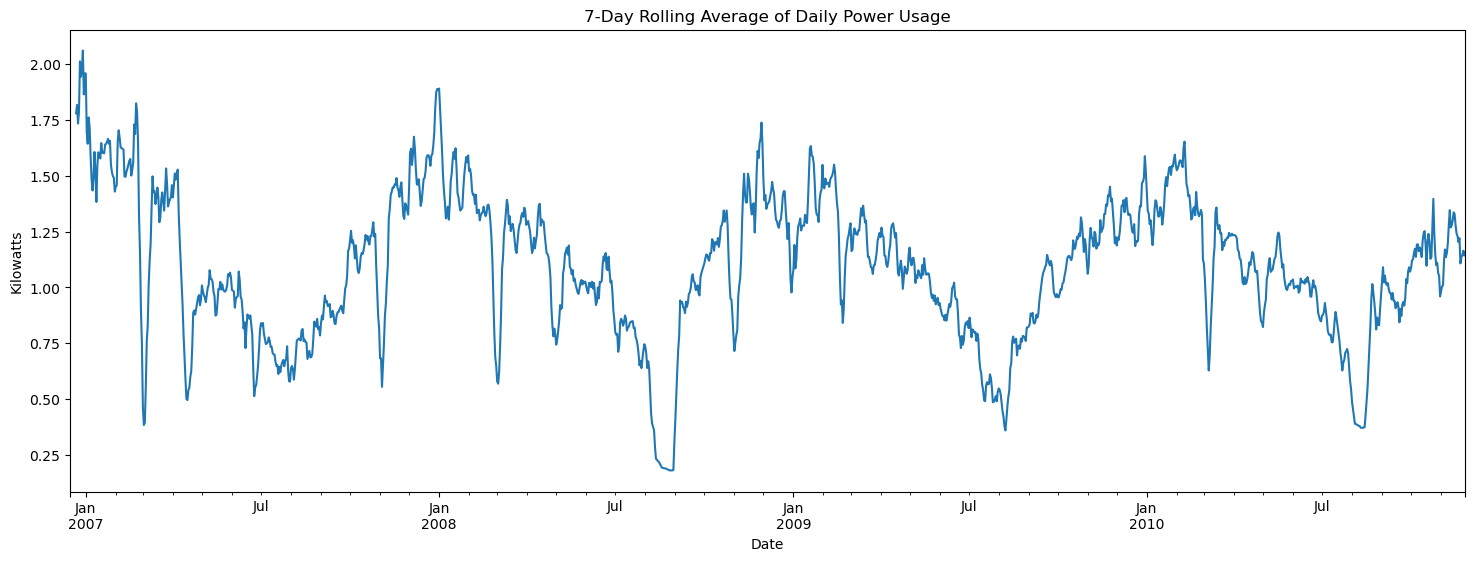

In [450]:
# Smoothed weekly trend (7-day moving average)

daily_avg.rolling(7).mean().plot(figsize=(18, 6), title='7-Day Rolling Average of Daily Power Usage')
plt.ylabel('Kilowatts')
plt.xlabel('Date')
plt.show()

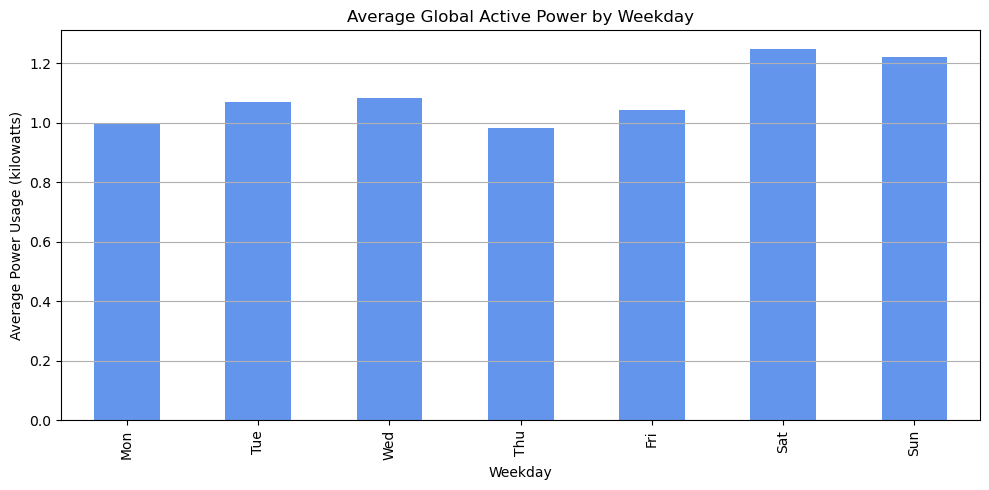

In [454]:
# Average Usage by Weekday

# Make sure Weekday is categorical (0=Monday, 6=Sunday)
weekday_avg = data.groupby('Weekday')['Global_active_power'].mean()

# Optional: Map weekday numbers to names
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_avg.index = weekday_labels

# Plot
plt.figure(figsize=(10, 5))
weekday_avg.plot(kind='bar', color='cornflowerblue')
plt.title('Average Global Active Power by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Power Usage (kilowatts)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

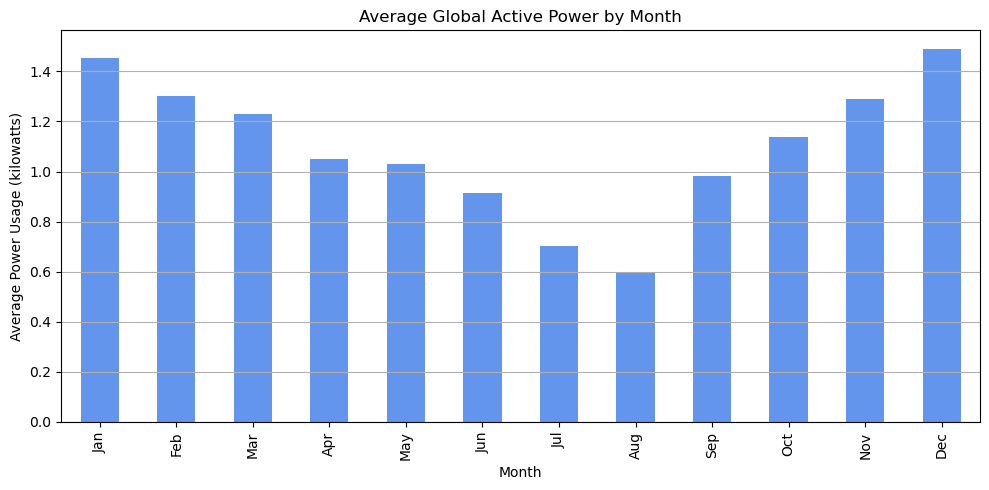

In [456]:
# Group by month extracted directly from the Date column
monthly_avg = data.groupby(pd.to_datetime(data['Date']).dt.month)['Global_active_power'].mean()

# Set proper month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg.index = month_labels

# Plot
plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='cornflowerblue')
plt.title('Average Global Active Power by Month')
plt.xlabel('Month')
plt.ylabel('Average Power Usage (kilowatts)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [458]:
# Demand Forecasting 

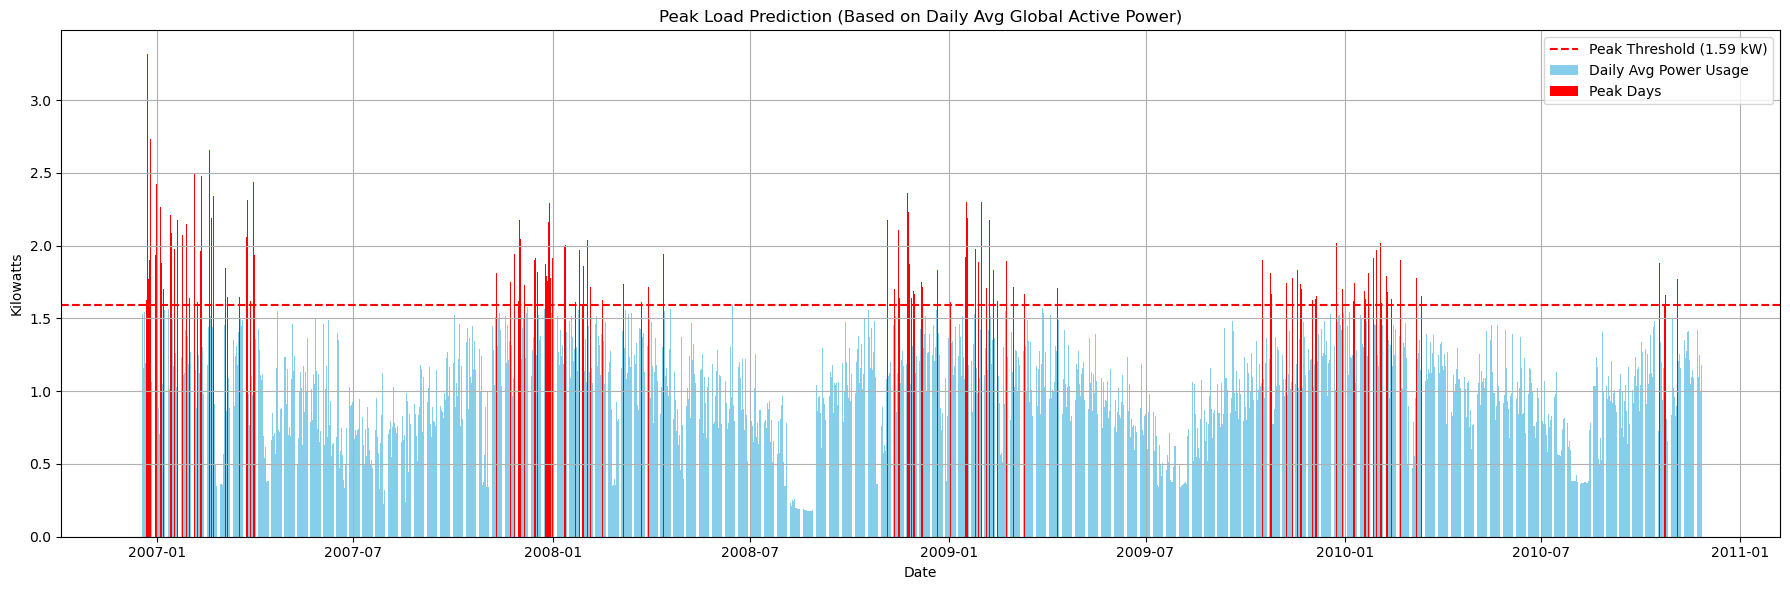

In [460]:
# Use Case: Peak Load Prediction (Visual Overlay)


# 1. Daily average of Global_active_power (or use GAP_rolling_60min if already smoothed)
daily_avg = data.groupby('Date')['Global_active_power'].mean()

# 2. Set a peak threshold (e.g., 90th percentile or custom)
peak_threshold = daily_avg.quantile(0.90)

# 3. Plot daily average power usage
plt.figure(figsize=(18, 6))
plt.bar(daily_avg.index, daily_avg.values, label='Daily Avg Power Usage', color='skyblue')

# 4. Overlay threshold line
plt.axhline(y=peak_threshold, color='red', linestyle='--', label=f'Peak Threshold ({peak_threshold:.2f} kW)')

# 5. Highlight peak days
peak_days = daily_avg[daily_avg > peak_threshold]
plt.bar(peak_days.index, peak_days.values, color='red', label='Peak Days')

# Final touches
plt.title('Peak Load Prediction (Based on Daily Avg Global Active Power)')
plt.xlabel('Date')
plt.ylabel('Kilowatts')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [462]:
# Anomaly Detection

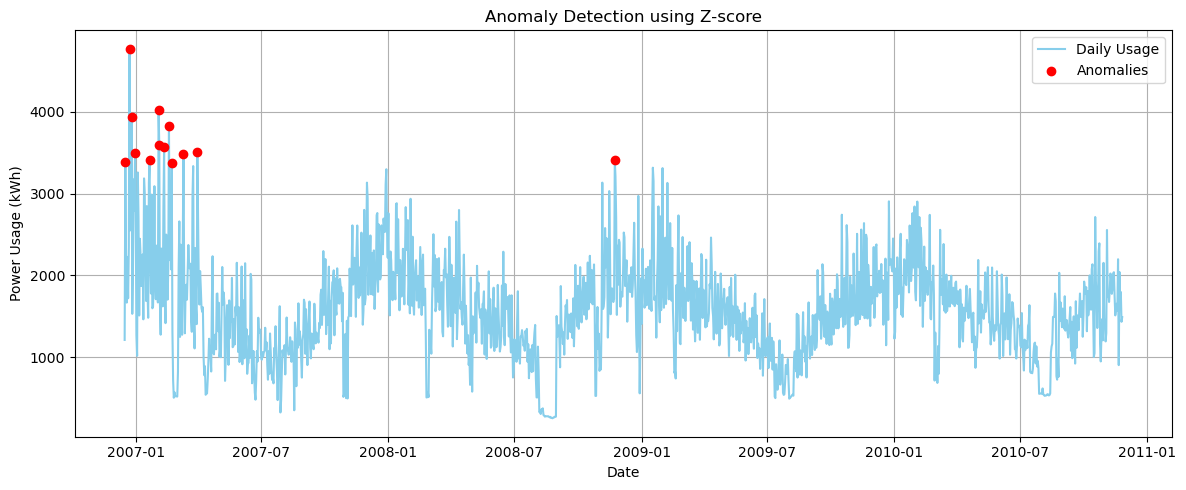

In [464]:
from scipy.stats import zscore

# Resample to daily usage
daily_usage = data.set_index('Date')['Global_active_power'].resample('D').sum()

# Calculate Z-scores
z_scores = zscore(daily_usage)
threshold = 3  # Adjust as needed
outliers = daily_usage[(abs(z_scores) > threshold)]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(daily_usage, label='Daily Usage', color='skyblue')
plt.scatter(outliers.index, outliers, color='red', label='Anomalies', zorder=5)
plt.title('Anomaly Detection using Z-score')
plt.xlabel('Date')
plt.ylabel('Power Usage (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [466]:
#  Environmental Impact

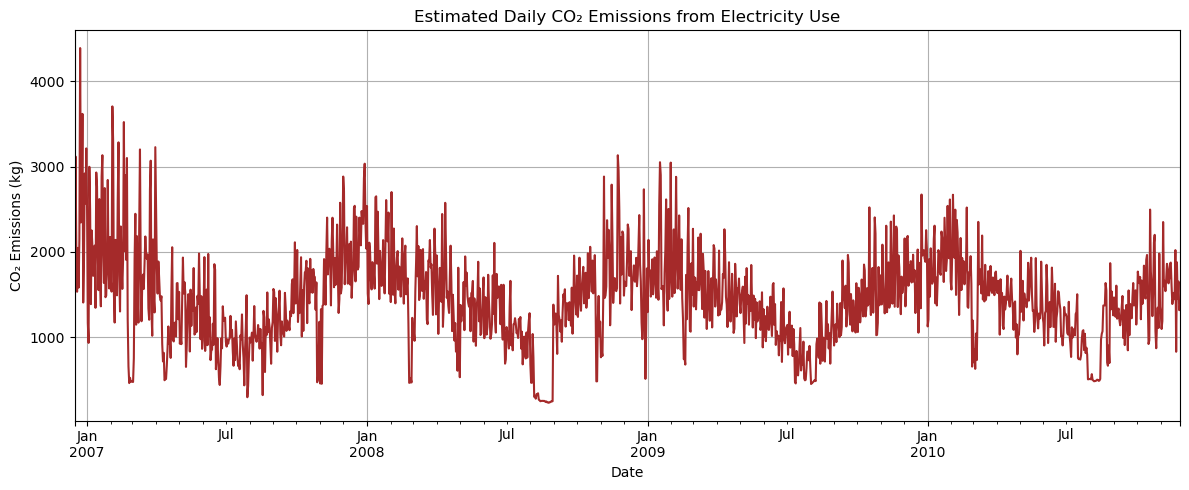

In [468]:
# Estimate CO₂ emissions using energy usage.

# Resample daily usage
daily_power_kwh = data.set_index('Date')['Global_active_power'].resample('D').sum()

# Estimate CO2 emissions
co2_per_kwh = 0.92  # kg CO₂ per kWh (example value)
daily_emissions = daily_power_kwh * co2_per_kwh

# Plot
plt.figure(figsize=(12, 5))
daily_emissions.plot(color='brown')
plt.title('Estimated Daily CO₂ Emissions from Electricity Use')
plt.xlabel('Date')
plt.ylabel('CO₂ Emissions (kg)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#  Smart Grid Integration

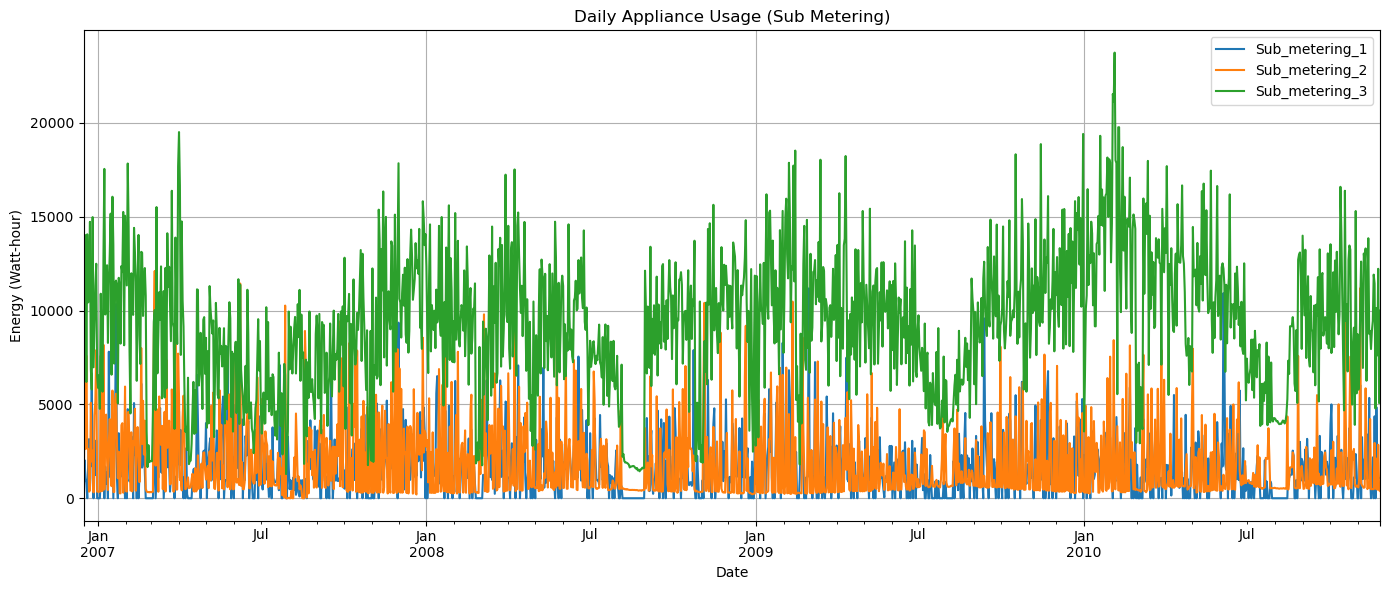

In [471]:
# Daily appliance energy
sub_meters = (
    data.set_index('Date')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
    .resample('D')
    .sum()
)

# Plot all together
sub_meters.plot(figsize=(14, 6))
plt.title('Daily Appliance Usage (Sub Metering)')
plt.xlabel('Date')
plt.ylabel('Energy (Watt-hour)')
plt.grid(True)
plt.tight_layout()
plt.show()


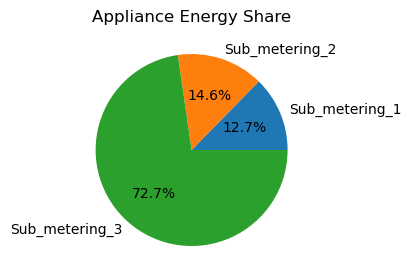

In [473]:
sub_meters = (
    data.set_index('Date')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
    .resample('D')
    .sum()
)
total_appliance = sub_meters.sum()
total_appliance_percent = (total_appliance / total_appliance.sum()) * 100
total_appliance_percent.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 6), title="Appliance Energy Share")
plt.ylabel('')
plt.tight_layout()
plt.show()

# Outlier treatment and transformation

In [714]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Date', 'Time', 'Hour', 'Weekday', 'Weekend',
       'Daily_avg', 'GAP_rolling_60min', 'Peak_Hour'],
      dtype='object')

In [716]:
selected_col = ['Global_active_power','Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3','Hour', 'Weekend']

<Axes: >

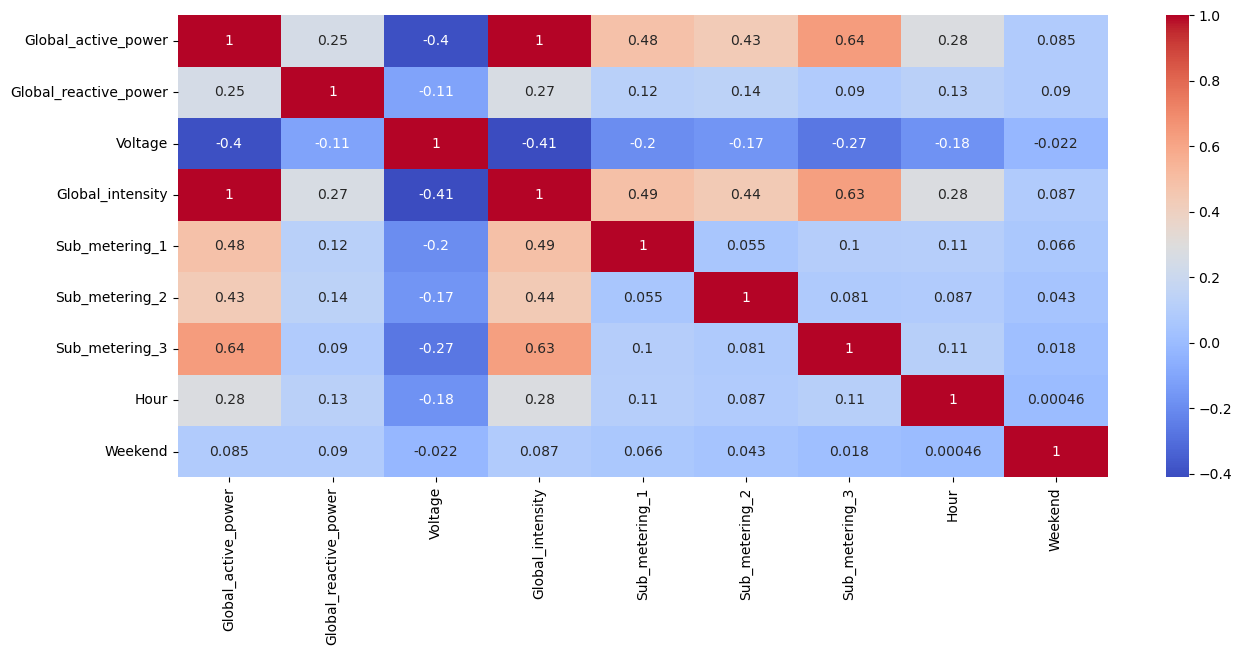

In [718]:
plt.figure(figsize=(15,6))

sns.heatmap(data[selected_col].corr(), cmap='coolwarm', annot= True)

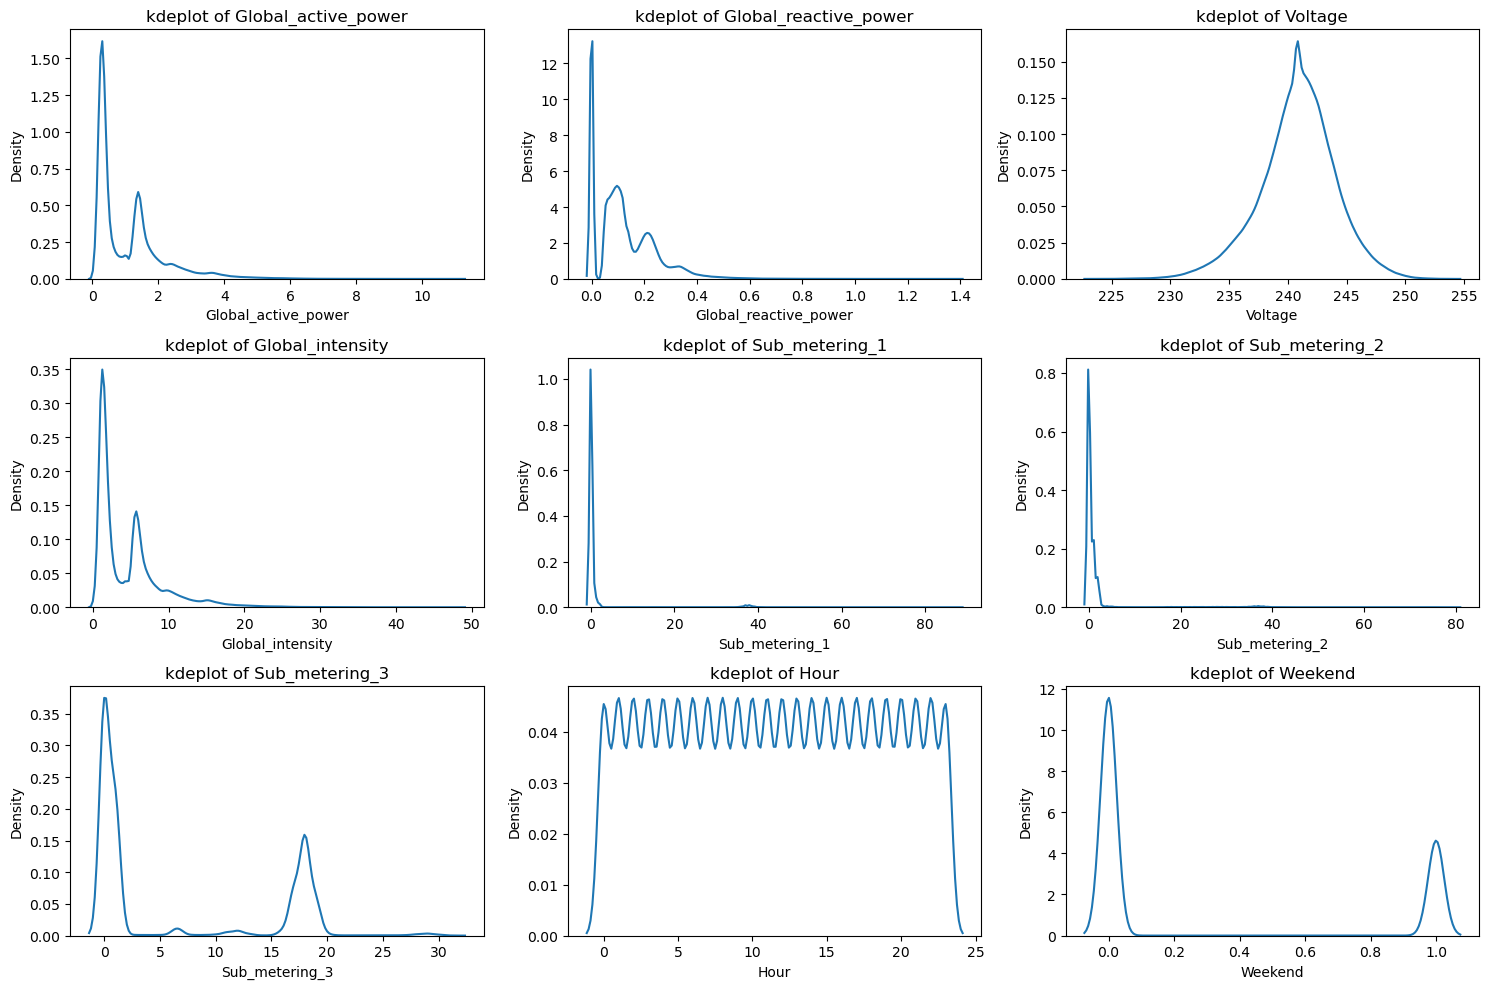

In [58]:
# kdeplot of all features

plt.figure(figsize=(15,10))

for idx, i in enumerate(selected_col):
    plt.subplot(3,3, idx + 1)
    sns.kdeplot(data[i])
    plt.title(f'kdeplot of {i}')
    plt.xlabel(i)
plt.tight_layout()
plt.show()

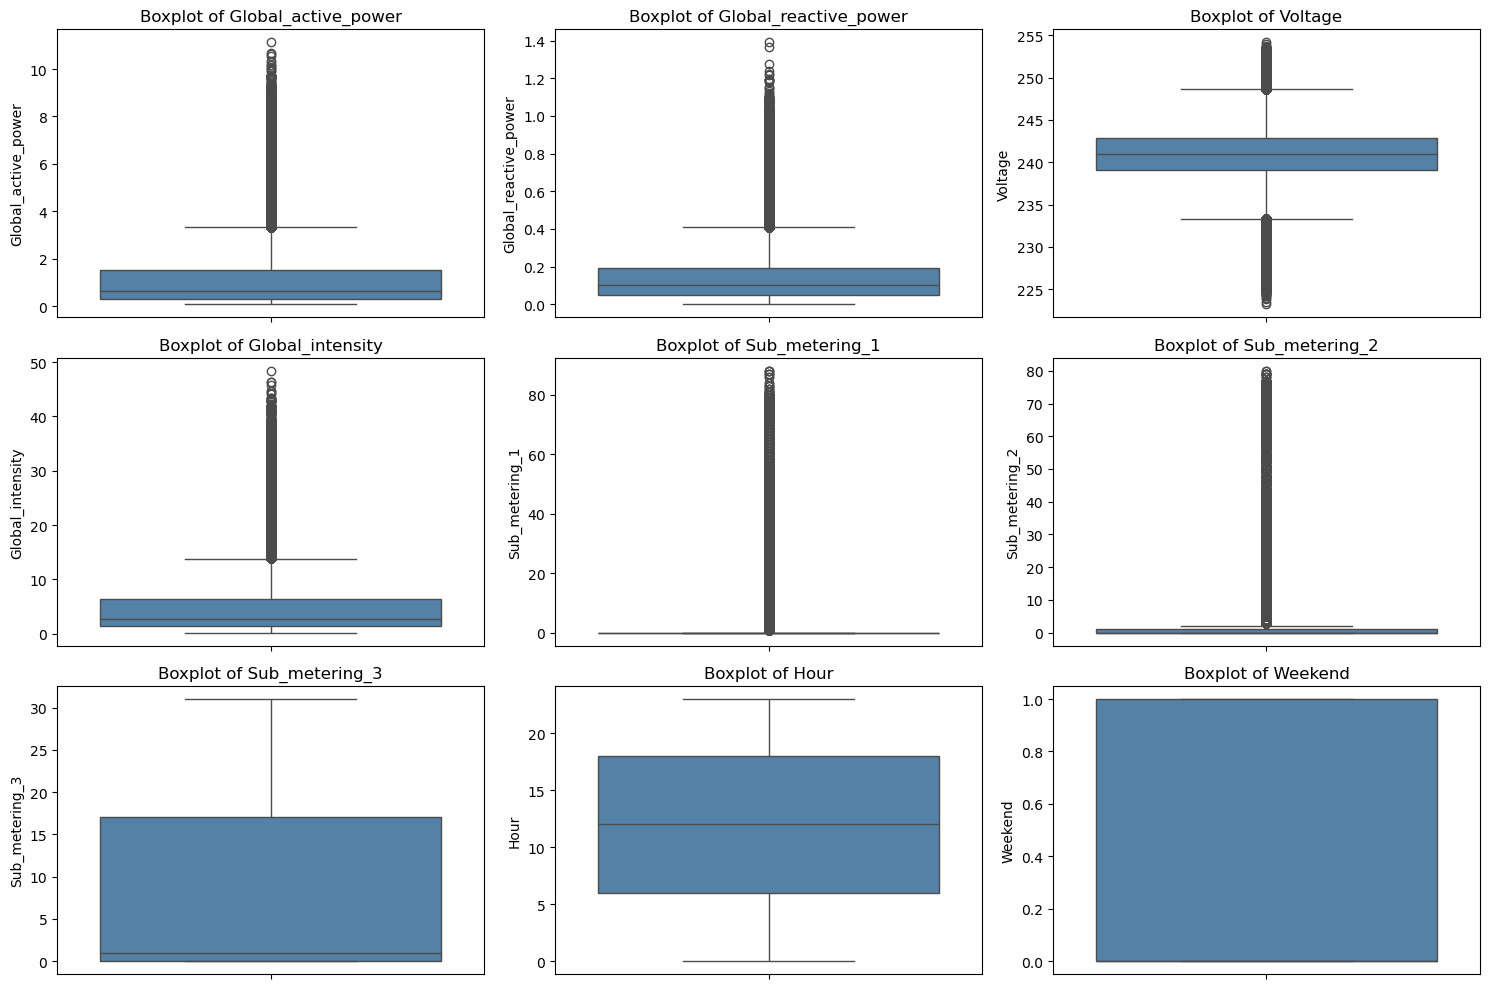

In [60]:
# boxplot of all features

plt.figure(figsize=(15, 10))  # Set overall figure size

for idx, col in enumerate(selected_col):
    plt.subplot(3, 3, idx + 1)  # 3 rows, 3 columns, current position
    sns.boxplot(y=data[col], color='steelblue')  # Vertical boxplot
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()  # Avoid overlapping labels
plt.show()

In [459]:
data['Sub_metering_1'].value_counts()

Sub_metering_1
0.0     1880175
1.0       84936
2.0       19017
38.0      16119
37.0      14892
         ...   
82.0          3
88.0          3
87.0          3
84.0          2
86.0          2
Name: count, Length: 90, dtype: int64

In [490]:
data['Sub_metering_2'].value_counts()

Sub_metering_2
0.000000     1436830
1.000000      378224
2.000000      157075
1.694374       13384
1.142687       12595
              ...   
50.000000         32
77.000000         24
79.000000          8
78.000000          3
80.000000          2
Name: count, Length: 83, dtype: int64

In [492]:
data['Sub_metering_3'].value_counts()

Sub_metering_3
0.000000     852092
1.000000     471868
18.000000    353163
17.000000    156593
19.000000    121326
12.000000     16726
16.000000     15831
6.701666      13384
6.362701      12595
11.000000     11282
29.000000      6931
13.000000      5339
20.000000      4670
28.000000      4364
10.000000      3309
30.000000      3119
9.000000       2011
6.000000       1993
2.000000       1970
7.000000       1954
3.000000       1935
8.000000       1922
4.000000       1913
5.000000       1899
27.000000      1337
26.000000       771
21.000000       726
23.000000       714
22.000000       700
25.000000       689
24.000000       664
15.000000       653
14.000000       538
31.000000       278
Name: count, dtype: int64

In [494]:
data.shape

(2075259, 15)

In [496]:
# checking how many values without zero (sub_metering_3)

2075259 - 1880175

195084

In [498]:
# 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3' - values can not be changed because it the proper value



In [720]:
selected_col = ['Global_reactive_power', 'Voltage', 'Global_intensity']

In [728]:
# log transform

log = np.log10(data[selected_col])

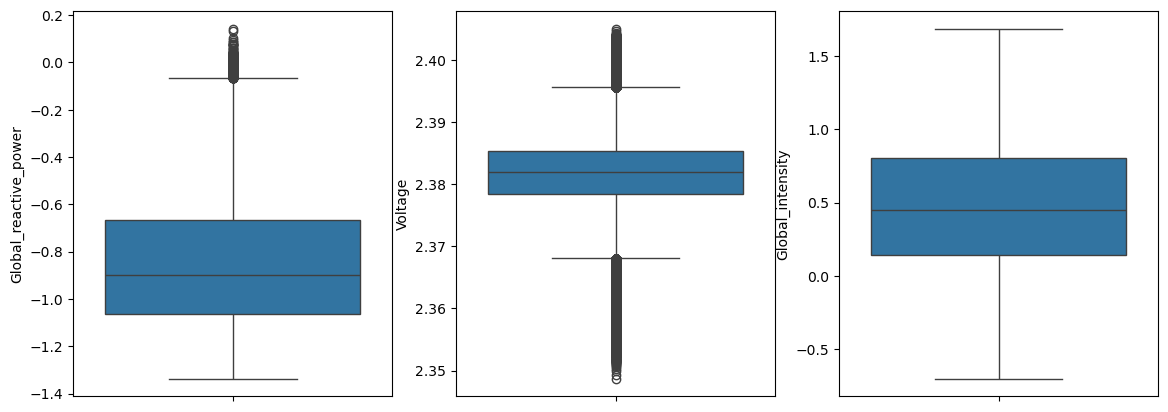

In [732]:
plt.figure(figsize=(14,5))
for ind, i in enumerate(log.columns):
    plt.subplot(1,3, ind + 1)
    sns.boxplot(log[i])

In [ ]:
# Boxcox

In [734]:
for col in selected_col:
    # Replace zeros with a small value
    temp = data[col].copy()
    temp[temp <= 0] = 1e-6  # or use np.nextafter(0, 1) for smallest float > 0

    transformed, _ = stats.boxcox(temp)
    data[f'boxcox_{col}'] = transformed

In [735]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Date', 'Time', 'Hour', 'Weekday', 'Weekend',
       'Daily_avg', 'GAP_rolling_60min', 'Peak_Hour',
       'boxcox_Global_reactive_power', 'boxcox_Voltage',
       'boxcox_Global_intensity'],
      dtype='object')

In [738]:
boxcox_val = ['boxcox_Global_reactive_power',
       'boxcox_Voltage', 'boxcox_Global_intensity']

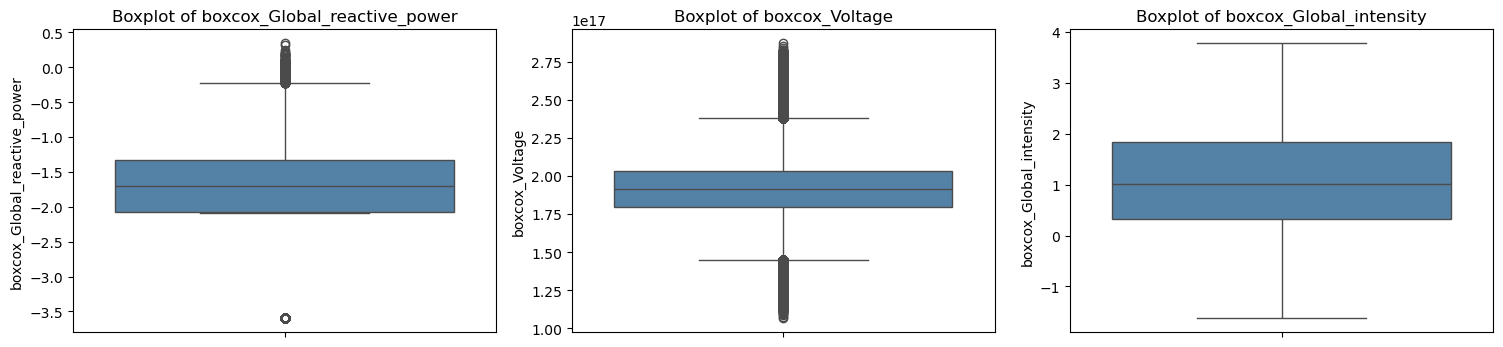

In [532]:
# boxccox boxplot

plt.figure(figsize=(15, 10))  # Set overall figure size

for idx, col in enumerate(boxcox_val):
    plt.subplot(3, 3, idx + 1)  # 3 rows, 3 columns, current position
    sns.boxplot(y=data[col], color='steelblue')  # Vertical boxplot
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()  # Avoid overlapping labels
plt.show()

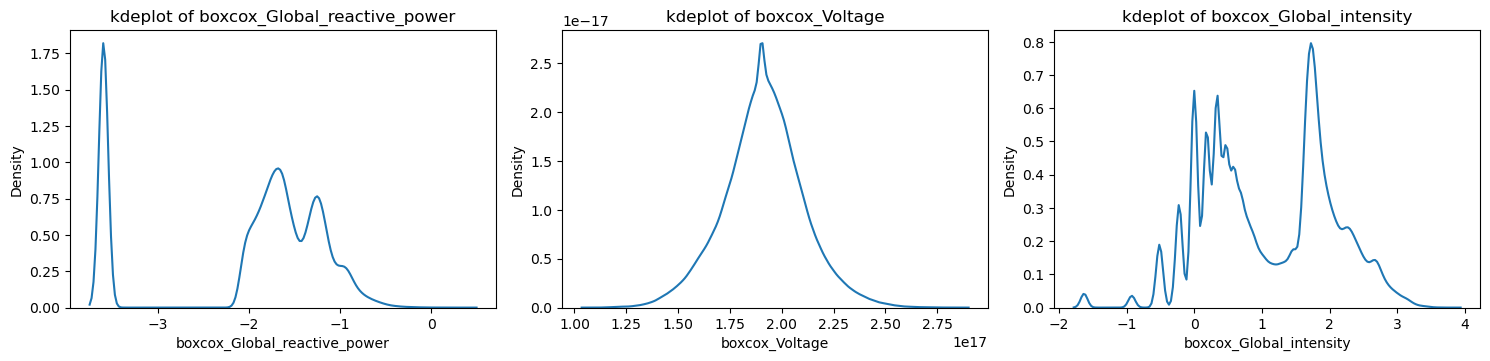

In [522]:
# boxcox kdeplot

plt.figure(figsize=(15,10))

for idx, i in enumerate(boxcox_val):
    plt.subplot(3,3, idx + 1)
    sns.kdeplot(data[i])
    plt.title(f'kdeplot of {i}')
    plt.xlabel(i)
plt.tight_layout()
plt.show()

In [532]:
data.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3       Date      Time  Hour  \
0             0.0             1.0            17.0 2006-12-16  17:24:00    17   
1             0.0             1.0            16.0 2006-12-16  17:25:00    17   
2             0.0             2.0            17.0 2006-12-16  17:26:00    17   
3             0.0             1.0            17.0 2006-12-16  17:27:00    17   
4             0.0             1.0            17.0 2006-12-16  17:28:00    17   

   Weekday  Weekend  Daily_avg  GAP_rolling_60min  Peak_Hour  \
0        5        1   3.053475           4.216000          0   
1        5        1   3.053475           4.788000          0   
2        5        1   3.053475           4.983333          0   
3        5        1   3.053475           5.084500          0   
4        5        1   3.053475           4.800800          0   

   boxcox_Global_reactive_power  boxcox_Voltage  boxcox_Global_intensity  
0                     -0.776757    1.571118e+17                 2.856927  
1                     -0.743289    1.510432e+17                 3.071315  
2                     -0.635201    1.493751e+17                 3.071315  
3                     -0.628572    1.515864e+17                 3.071315  
4                     -0.586398    1.614483e+17                 2.710199

In [740]:
d1 = data.drop(['Date', 'Time'],axis= 1).columns

<Axes: >

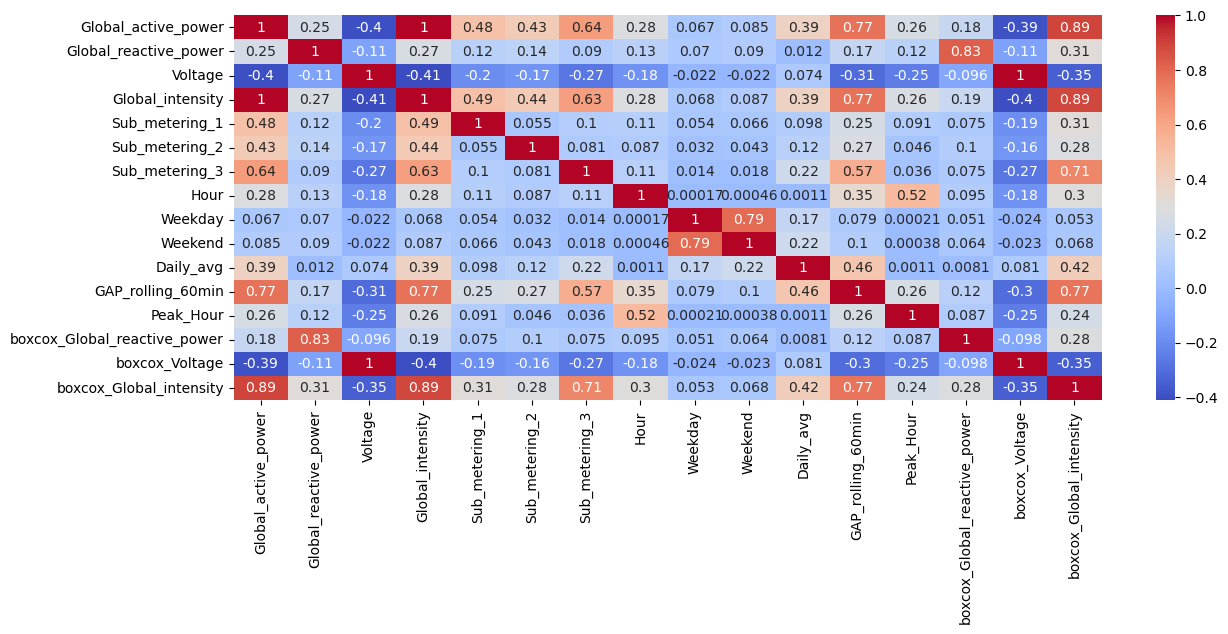

In [742]:
plt.figure(figsize=(14,5))

sns.heatmap(data[d1].corr(), cmap = 'coolwarm', annot = True)

In [764]:
# copy of Dataframe

data1 = data.copy()

In [ ]:
# IQR only for boxcox_Global_reactive_power and boxcox_Voltage

In [766]:
iqr_col = ['boxcox_Global_reactive_power', 'boxcox_Voltage']

In [770]:

def cap_outliers_iqr_series(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(series < lower, lower,
                    np.where(series > upper, upper, series))

# Use this to only update data1 without modifying data
for col in iqr_col:
    data1[f'iqr_{col}'] = cap_outliers_iqr_series(data[col])

In [772]:
data1.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Date', 'Time', 'Hour', 'Weekday', 'Weekend',
       'Daily_avg', 'GAP_rolling_60min', 'Peak_Hour',
       'boxcox_Global_reactive_power', 'boxcox_Voltage',
       'boxcox_Global_intensity', 'iqr_boxcox_Global_reactive_power',
       'iqr_boxcox_Voltage'],
      dtype='object')

In [774]:
iqr = ['iqr_boxcox_Global_reactive_power', 'iqr_boxcox_Voltage',
       'boxcox_Global_intensity']

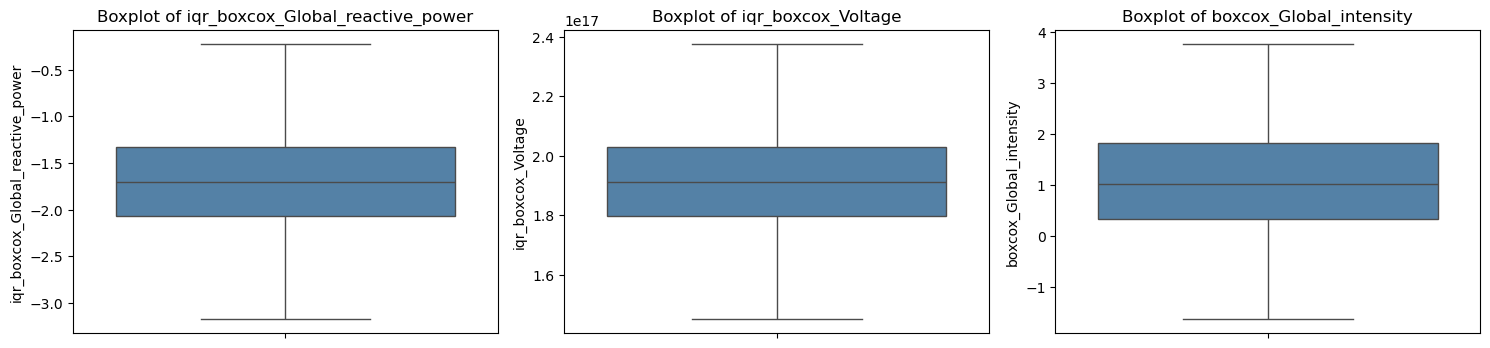

In [782]:
plt.figure(figsize=(15, 10))  # Set overall figure size

for idx, col in enumerate(iqr):
    plt.subplot(3, 3, idx + 1)  # 3 rows, 3 columns, current position
    sns.boxplot(y=data1[col], color='steelblue')  # Vertical boxplot
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()  # Avoid overlapping labels
plt.show()

In [778]:
# droping raw features

data1.drop(['Global_reactive_power', 'Voltage',
       'Global_intensity','Date', 'Time', 'Weekday','boxcox_Global_reactive_power', 'boxcox_Voltage',
       'Daily_avg', 'GAP_rolling_60min', 'Peak_Hour'], axis=1, inplace=True)

In [780]:
data1.head()

Global_active_power  Sub_metering_1  Sub_metering_2  Sub_metering_3  Hour  \
0                4.216             0.0             1.0            17.0    17   
1                5.360             0.0             1.0            16.0    17   
2                5.374             0.0             2.0            17.0    17   
3                5.388             0.0             1.0            17.0    17   
4                3.666             0.0             1.0            17.0    17   

   Weekend  boxcox_Global_intensity  iqr_boxcox_Global_reactive_power  \
0        1                 2.856927                         -0.776757   
1        1                 3.071315                         -0.743289   
2        1                 3.071315                         -0.635201   
3        1                 3.071315                         -0.628572   
4        1                 2.710199                         -0.586398   

   iqr_boxcox_Voltage  
0        1.571118e+17  
1        1.510432e+17  
2        1.493751e+17  
3        1.515864e+17  
4        1.614483e+17

<Axes: >

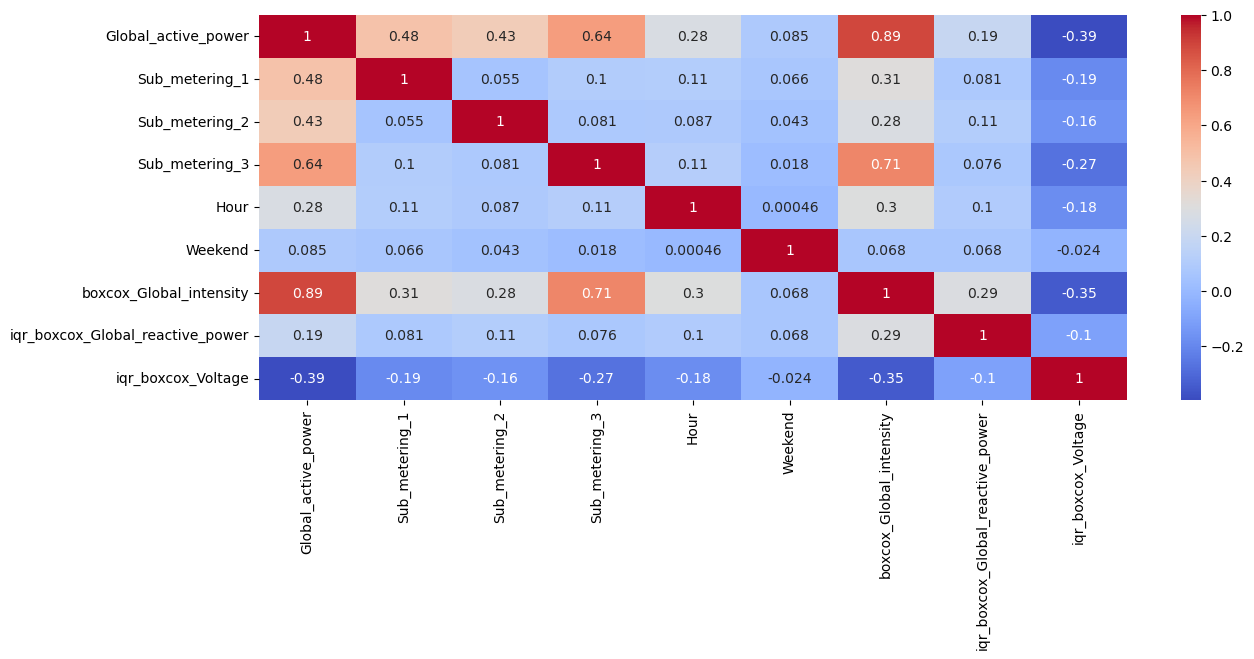

In [784]:
plt.figure(figsize=(14,5))

sns.heatmap(data1.corr(), cmap = 'coolwarm', annot = True)

# StandardScaling

In [786]:
#init

ss = StandardScaler()

In [788]:
data1.dtypes

Global_active_power                 float64
Sub_metering_1                      float64
Sub_metering_2                      float64
Sub_metering_3                      float64
Hour                                  int32
Weekend                               int64
boxcox_Global_intensity             float64
iqr_boxcox_Global_reactive_power    float64
iqr_boxcox_Voltage                  float64
dtype: object

In [790]:
# Separate input features and target
# weekend is in binary so im not scaling

X = data1.drop(['Global_active_power','Weekend'], axis=1)
y = data1[['Global_active_power','Weekend']]

In [792]:
# Fit and transform the input features
X_scaled = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

In [794]:
X_scaled.head()

Sub_metering_1  Sub_metering_2  Sub_metering_3      Hour  \
0       -0.183906       -0.051875        1.257194  0.794432   
1       -0.183906       -0.051875        1.137922  0.794432   
2       -0.183906        0.120969        1.257194  0.794432   
3       -0.183906       -0.051875        1.257194  0.794432   
4       -0.183906       -0.051875        1.257194  0.794432   

   boxcox_Global_intensity  iqr_boxcox_Global_reactive_power  \
0                 1.886415                          1.469389   
1                 2.115596                          1.513121   
2                 2.115596                          1.654354   
3                 2.115596                          1.663016   
4                 1.729564                          1.718123   

   iqr_boxcox_Voltage  
0           -1.822189  
1           -2.145969  
2           -2.234969  
3           -2.116991  
4           -1.590824

In [796]:
# Combine the scaled features back with the target (optional)
data1_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

In [798]:
data1_scaled

Sub_metering_1  Sub_metering_2  Sub_metering_3      Hour  \
0             -0.183906       -0.051875        1.257194  0.794432   
1             -0.183906       -0.051875        1.137922  0.794432   
2             -0.183906        0.120969        1.257194  0.794432   
3             -0.183906       -0.051875        1.257194  0.794432   
4             -0.183906       -0.051875        1.257194  0.794432   
...                 ...             ...             ...       ...   
2075254       -0.183906       -0.224719       -0.770429  1.227819   
2075255       -0.183906       -0.224719       -0.770429  1.227819   
2075256       -0.183906       -0.224719       -0.770429  1.372281   
2075257       -0.183906       -0.224719       -0.770429  1.372281   
2075258       -0.183906       -0.224719       -0.770429  1.372281   

         boxcox_Global_intensity  iqr_boxcox_Global_reactive_power  \
0                       1.886415                          1.469389   
1                       2.115596                          1.513121   
2                       2.115596                          1.654354   
3                       2.115596                          1.663016   
4                       1.729564                          1.718123   
...                          ...                               ...   
2075254                 0.300794                         -1.666326   
2075255                 0.300794                         -1.666326   
2075256                 0.246940                         -1.666326   
2075257                 0.246940                         -1.666326   
2075258                 0.246940                         -1.666326   

         iqr_boxcox_Voltage  Global_active_power  Weekend  
0                 -1.822189                4.216        1  
1                 -2.145969                5.360        1  
2                 -2.234969                5.374        1  
3                 -2.116991                5.388        1  
4                 -1.590824                3.666        1  
...                     ...                  ...      ...  
2075254           -0.175172                0.946        0  
2075255           -0.311146                0.944        0  
2075256           -0.367588                0.938        0  
2075257           -0.405060                0.934        0  
2075258           -0.451726                0.932        0  

[2075259 rows x 9 columns]

# Feature selection

<Axes: >

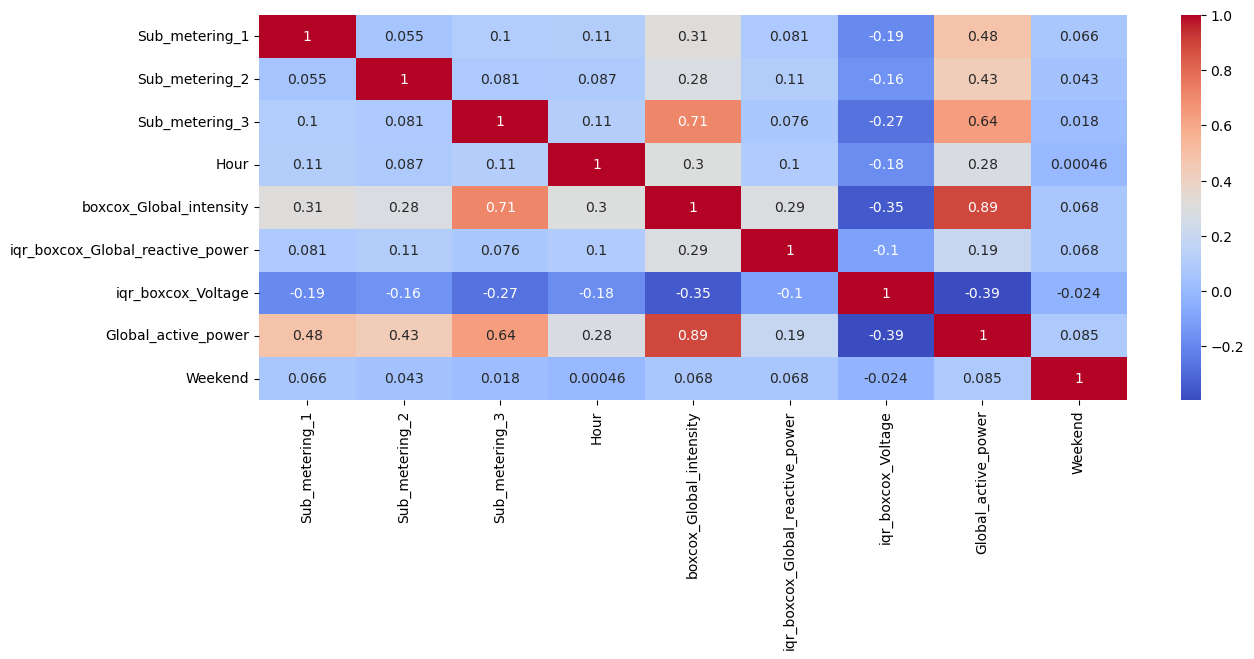

In [802]:
plt.figure(figsize=(14,5))

sns.heatmap(data1_scaled.corr(), cmap = 'coolwarm', annot = True)

# ML model

## Linear Regression

In [1116]:
# split value and target

val = data1_scaled.drop(['Global_active_power'], axis=1)

tar = data1_scaled['Global_active_power']

In [1118]:
val

Sub_metering_1  Sub_metering_2  Sub_metering_3      Hour  \
0             -0.183906       -0.051875        1.257194  0.794432   
1             -0.183906       -0.051875        1.137922  0.794432   
2             -0.183906        0.120969        1.257194  0.794432   
3             -0.183906       -0.051875        1.257194  0.794432   
4             -0.183906       -0.051875        1.257194  0.794432   
...                 ...             ...             ...       ...   
2075254       -0.183906       -0.224719       -0.770429  1.227819   
2075255       -0.183906       -0.224719       -0.770429  1.227819   
2075256       -0.183906       -0.224719       -0.770429  1.372281   
2075257       -0.183906       -0.224719       -0.770429  1.372281   
2075258       -0.183906       -0.224719       -0.770429  1.372281   

         boxcox_Global_intensity  iqr_boxcox_Global_reactive_power  \
0                       1.886415                          1.469389   
1                       2.115596                          1.513121   
2                       2.115596                          1.654354   
3                       2.115596                          1.663016   
4                       1.729564                          1.718123   
...                          ...                               ...   
2075254                 0.300794                         -1.666326   
2075255                 0.300794                         -1.666326   
2075256                 0.246940                         -1.666326   
2075257                 0.246940                         -1.666326   
2075258                 0.246940                         -1.666326   

         iqr_boxcox_Voltage  Weekend  
0                 -1.822189        1  
1                 -2.145969        1  
2                 -2.234969        1  
3                 -2.116991        1  
4                 -1.590824        1  
...                     ...      ...  
2075254           -0.175172        0  
2075255           -0.311146        0  
2075256           -0.367588        0  
2075257           -0.405060        0  
2075258           -0.451726        0  

[2075259 rows x 8 columns]

In [1120]:
tar

0          4.216
1          5.360
2          5.374
3          5.388
4          3.666
           ...  
2075254    0.946
2075255    0.944
2075256    0.938
2075257    0.934
2075258    0.932
Name: Global_active_power, Length: 2075259, dtype: float64

In [1122]:
trdata, tsdata, trlabel, tslabel = train_test_split(val, tar, test_size= 0.20, random_state=45)

In [1125]:
#init

model = LinearRegression()

In [1127]:
model.fit(trdata, trlabel)

LinearRegression()

In [1129]:
tr_pred = model.predict(trdata)
ts_pred = model.predict(tsdata)

In [1131]:
# metrics

In [1133]:
def metrics(lab, pred):
    rmse = root_mean_squared_error(lab, pred)
    mse = mean_squared_error(lab, pred)
    r2 = r2_score(lab, pred)
    mae = mean_absolute_error(lab, pred)
    
    return pd.DataFrame({
        'RMSE': [rmse],
        'MSE' : [mse],
        'R-squared' : [r2],
        'MAE' : [mae]
    },index=[0])


In [1135]:
metrics(trlabel, tr_pred)

RMSE       MSE  R-squared       MAE
0  0.344236  0.118498   0.892828  0.230098

In [1137]:
metrics(tslabel, ts_pred)

RMSE       MSE  R-squared       MAE
0  0.342368  0.117216   0.893185  0.229259

## Lasso

In [1142]:
lass = Lasso(alpha = 0.5)

In [1144]:
lass.fit(trdata, trlabel)

Lasso(alpha=0.5)

In [1146]:
tr_pred_l = model.predict(trdata)
ts_pred_l = model.predict(tsdata)

In [1148]:
metrics(trlabel, tr_pred_l)

RMSE       MSE  R-squared       MAE
0  0.344236  0.118498   0.892828  0.230098

In [1150]:
metrics(tslabel, ts_pred_l)

RMSE       MSE  R-squared       MAE
0  0.342368  0.117216   0.893185  0.229259

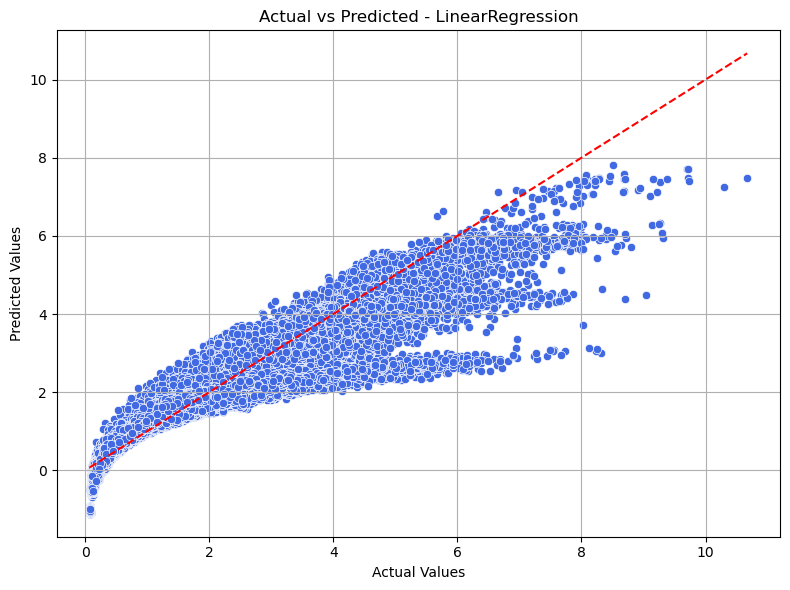

In [1152]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tslabel, y=ts_pred_l, color='royalblue', edgecolor='white')
plt.plot([tslabel.min(), tslabel.max()], [tslabel.min(), tslabel.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - LinearRegression")
plt.grid(True)
plt.tight_layout()
plt.show()

## Random Forest

## Feature Selection

In [1001]:
# Embeded method 

fs = RandomForestRegressor(n_estimators=20, random_state= 67)          # n_estimators ---> models

fs.fit(val, tar)

RandomForestRegressor(n_estimators=20, random_state=67)

In [1008]:
fs.feature_importances_

array([2.37132909e-04, 9.90009685e-05, 1.73786599e-04, 1.95939298e-04,
       9.98172490e-01, 5.20245578e-04, 5.64409089e-04, 3.69952729e-05])

In [1010]:
pd.DataFrame({
    "columns" : val.columns,
    "score":fs.feature_importances_*100
}).sort_values('score', ascending= False)

columns      score
4           boxcox_Global_intensity  99.817249
6                iqr_boxcox_Voltage   0.056441
5  iqr_boxcox_Global_reactive_power   0.052025
0                    Sub_metering_1   0.023713
3                              Hour   0.019594
2                    Sub_metering_3   0.017379
1                    Sub_metering_2   0.009900
7                           Weekend   0.003700

## RandomForestRegressor model

In [1013]:
# split value and target

val = data1_scaled.drop(['Global_active_power','Weekend'], axis=1)

tar = data1_scaled['Global_active_power']

In [1016]:
trdata, tsdata, trlabel, tslabel = train_test_split(val, tar, test_size= 0.20, random_state=45)

In [1018]:
# init

rr = RandomForestRegressor(random_state=56, n_estimators=10)

rr.fit(trdata, trlabel)

RandomForestRegressor(n_estimators=10, random_state=56)

In [1020]:
tr_pred = rr.predict(trdata)
ts_pred = rr.predict(tsdata)

In [1022]:
metrics(trlabel, tr_pred)

RMSE       MSE  R-squared       MAE
0  0.013302  0.000177    0.99984  0.007089

In [1024]:
metrics(tslabel, ts_pred)

RMSE       MSE  R-squared       MAE
0  0.03094  0.000957   0.999128  0.016963

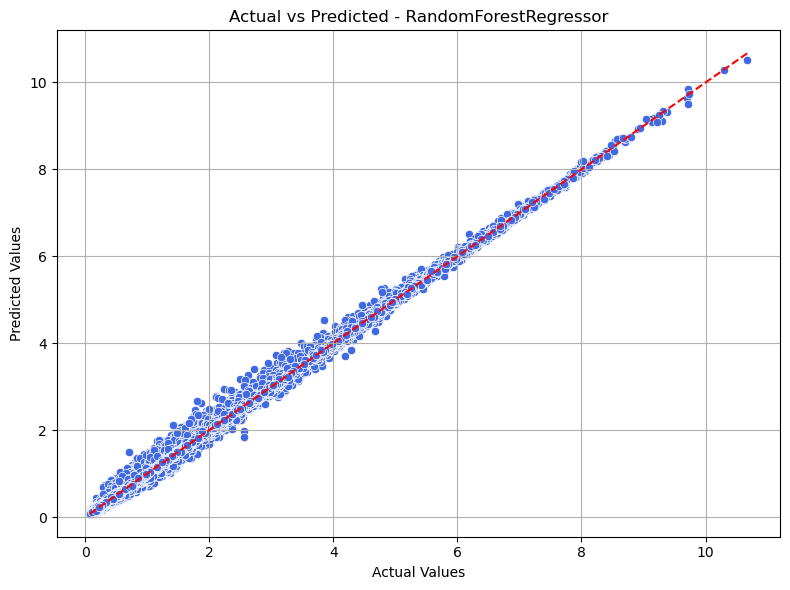

In [1026]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tslabel, y=ts_pred, color='royalblue', edgecolor='white')
plt.plot([tslabel.min(), tslabel.max()], [tslabel.min(), tslabel.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - RandomForestRegressor")
plt.grid(True)
plt.tight_layout()
plt.show()

In [1028]:
# Hyper parameter Tuning


para = {

    "max_depth" : [3,5,6],
    "n_estimators":[2,5,3],
    "random_state":[66,77],
    "min_samples_split":[2,3],
    "max_features": [3,5]
}

rfr = RandomForestRegressor()

gscv = GridSearchCV(param_grid=para, estimator=rfr, cv =5)

gscv.fit(trdata, trlable)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 6], 'max_features': [3, 5],
                         'min_samples_split': [2, 3], 'n_estimators': [2, 5, 3],
                         'random_state': [66, 77]})

In [1030]:
best = gscv.best_estimator_

In [1032]:
best

RandomForestRegressor(max_depth=6, max_features=5, n_estimators=5,
                      random_state=77)

In [1034]:
tr_pred = best.predict(trdata)
ts_pred = best.predict(tsdata)

In [1036]:
metrics(trlable, tr_pred)

RMSE       MSE  R-squared       MAE
0  0.057219  0.003274   0.997039  0.037632

In [1038]:
metrics(tslable, ts_pred)

RMSE       MSE  R-squared       MAE
0  0.057425  0.003298   0.996995  0.037582

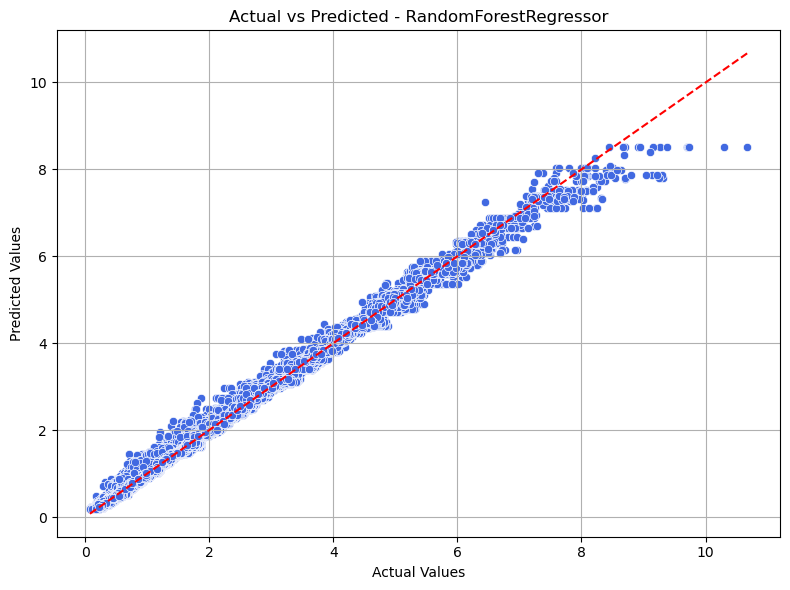

In [1040]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tslable, y=ts_pred, color='royalblue', edgecolor='white')
plt.plot([tslable.min(), tslable.max()], [tslable.min(), tslable.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - RandomForestRegressor")
plt.grid(True)
plt.tight_layout()
plt.show()

## Gradient Boosting Regressor

In [1067]:
gr = GradientBoostingRegressor(n_estimators=100, random_state=42, subsample=0.8, max_depth=5, learning_rate=0.05)



In [1069]:
gr

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, random_state=42,
                          subsample=0.8)

In [1071]:
gr.fit(trdata, trlabel)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, random_state=42,
                          subsample=0.8)

In [1073]:
# predict

tr_pred_gb = gr.predict(trdata)
ts_pred_gb = gr.predict(tsdata)

In [1075]:
# train perfomance

metrics(trlabel, tr_pred_gb)

RMSE       MSE  R-squared       MAE
0  0.034012  0.001157   0.998954  0.021424

In [1081]:
metrics(tslabel, ts_pred_gb)

RMSE       MSE  R-squared       MAE
0  0.034534  0.001193   0.998913  0.021474

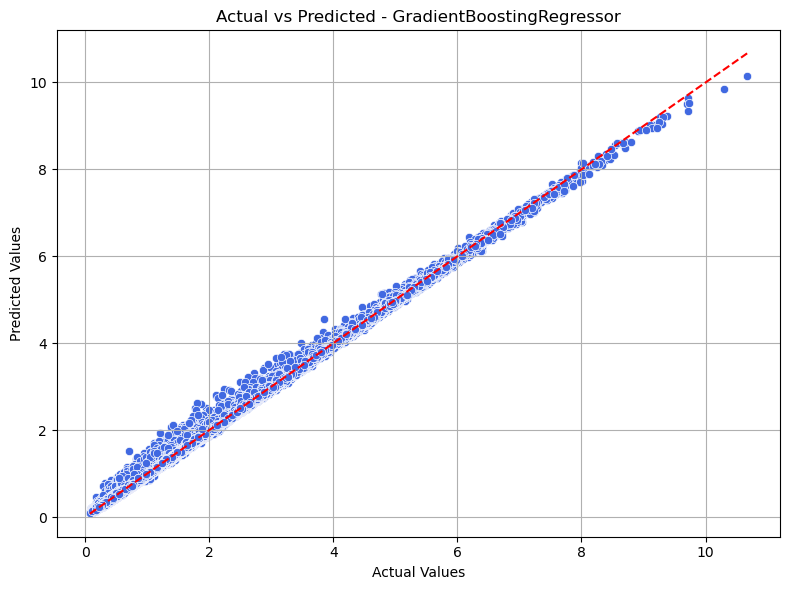

In [1085]:
# Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tslabel, y=ts_pred_gb, color='royalblue', edgecolor='white')
plt.plot([tslable.min(), tslable.max()], [tslable.min(), tslable.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - GradientBoostingRegressor")
plt.grid(True)
plt.tight_layout()
plt.show()

## Xgb

In [1096]:
xgb = XGBRegressor(n_estimators=100, random_state=66, max_depth=3, learning_rate=0.08)

In [1098]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [1100]:
xgb.fit(trdata, trlabel)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [1102]:
tr_pred_xgb = xgb.predict(trdata)
ts_pred_xgb = xgb.predict(tsdata)

In [1104]:
metrics(trlabel, tr_pred_xgb)

RMSE       MSE  R-squared       MAE
0  0.03517  0.001237   0.998881  0.022214

In [1106]:
metrics(tslabel, ts_pred_xgb)

RMSE       MSE  R-squared       MAE
0  0.03565  0.001271   0.998842  0.022276

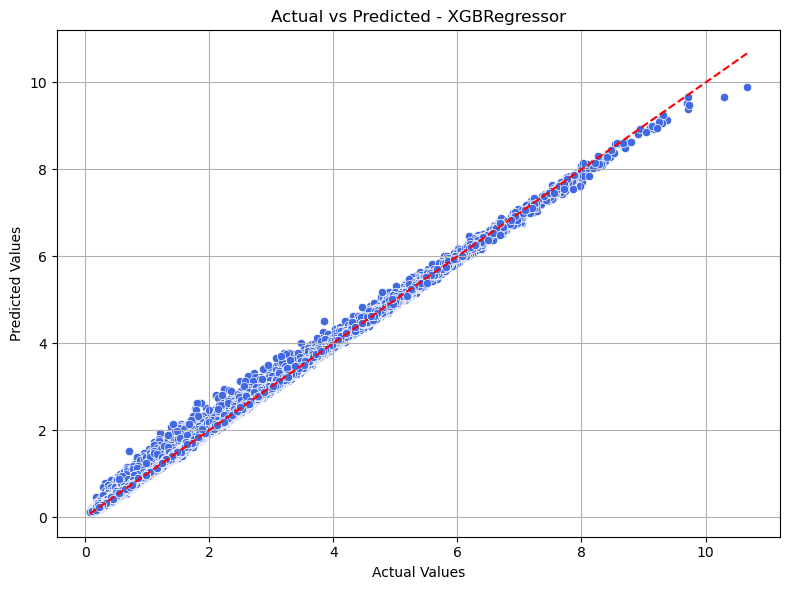

In [1114]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tslabel, y=ts_pred_xgb, color='royalblue', edgecolor='white')
plt.plot([tslable.min(), tslable.max()], [tslable.min(), tslable.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - XGBRegressor")
plt.grid(True)
plt.tight_layout()
plt.show()

## Model selection

In [1112]:
comparison = pd.DataFrame({
    'Model': ['LinearReg', 'RF', 'RF Grid', 'GBR', 'XGB'],
    'Test_R2': [0.893, 0.9991, 0.9969, 0.9989, 0.9988],
    'Test_RMSE': [0.342, 0.031, 0.057, 0.035, 0.036],
    'Test_MAE': [0.229, 0.017, 0.037, 0.021, 0.022]
})
print(comparison.sort_values(by='Test_R2', ascending=False))

       Model  Test_R2  Test_RMSE  Test_MAE
1         RF   0.9991      0.031     0.017
3        GBR   0.9989      0.035     0.021
4        XGB   0.9988      0.036     0.022
2    RF Grid   0.9969      0.057     0.037
0  LinearReg   0.8930      0.342     0.229


In [1159]:
# selecting model

#  Random Forest (with GridSearch)
""""Most stable and interpretable with balanced performance"

✅ R² ~ 0.997 on test → Excellent generalization

✅ Very small gap between train and test scores

✅ Less complex model compared to boosting methods

✅ Easier to interpret using feature importance

✅ Faster to train and debug"""

'"Most stable and interpretable with balanced performance"\n\n✅ R² ~ 0.997 on test → Excellent generalization\n\n✅ Very small gap between train and test scores\n\n✅ Less complex model compared to boosting methods\n\n✅ Easier to interpret using feature importance\n\n✅ Faster to train and debug'